In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('rock_density_xray.csv')

In [5]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [9]:
df.columns = ['Signal', 'Density']

In [11]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<Axes: xlabel='Signal', ylabel='Density'>

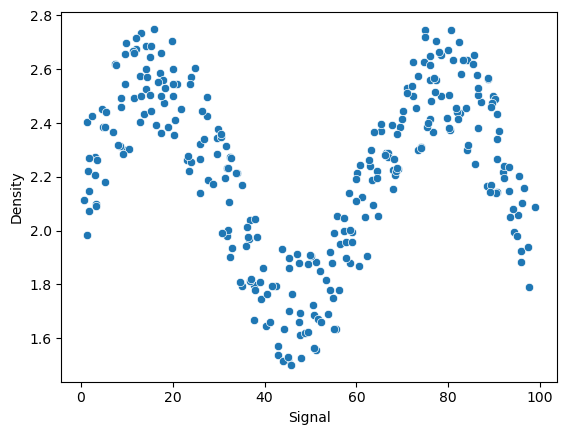

In [17]:
sns.scatterplot(x = 'Signal', y = 'Density', data = df)

In [23]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [29]:
from sklearn.linear_model import LinearRegression

In [31]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.21119897331863297
0.06605167265148638


In [47]:
signal_range = np.arange(0, 100)
signal_preds = lr_model.predict(signal_range.reshape(-1, 1))

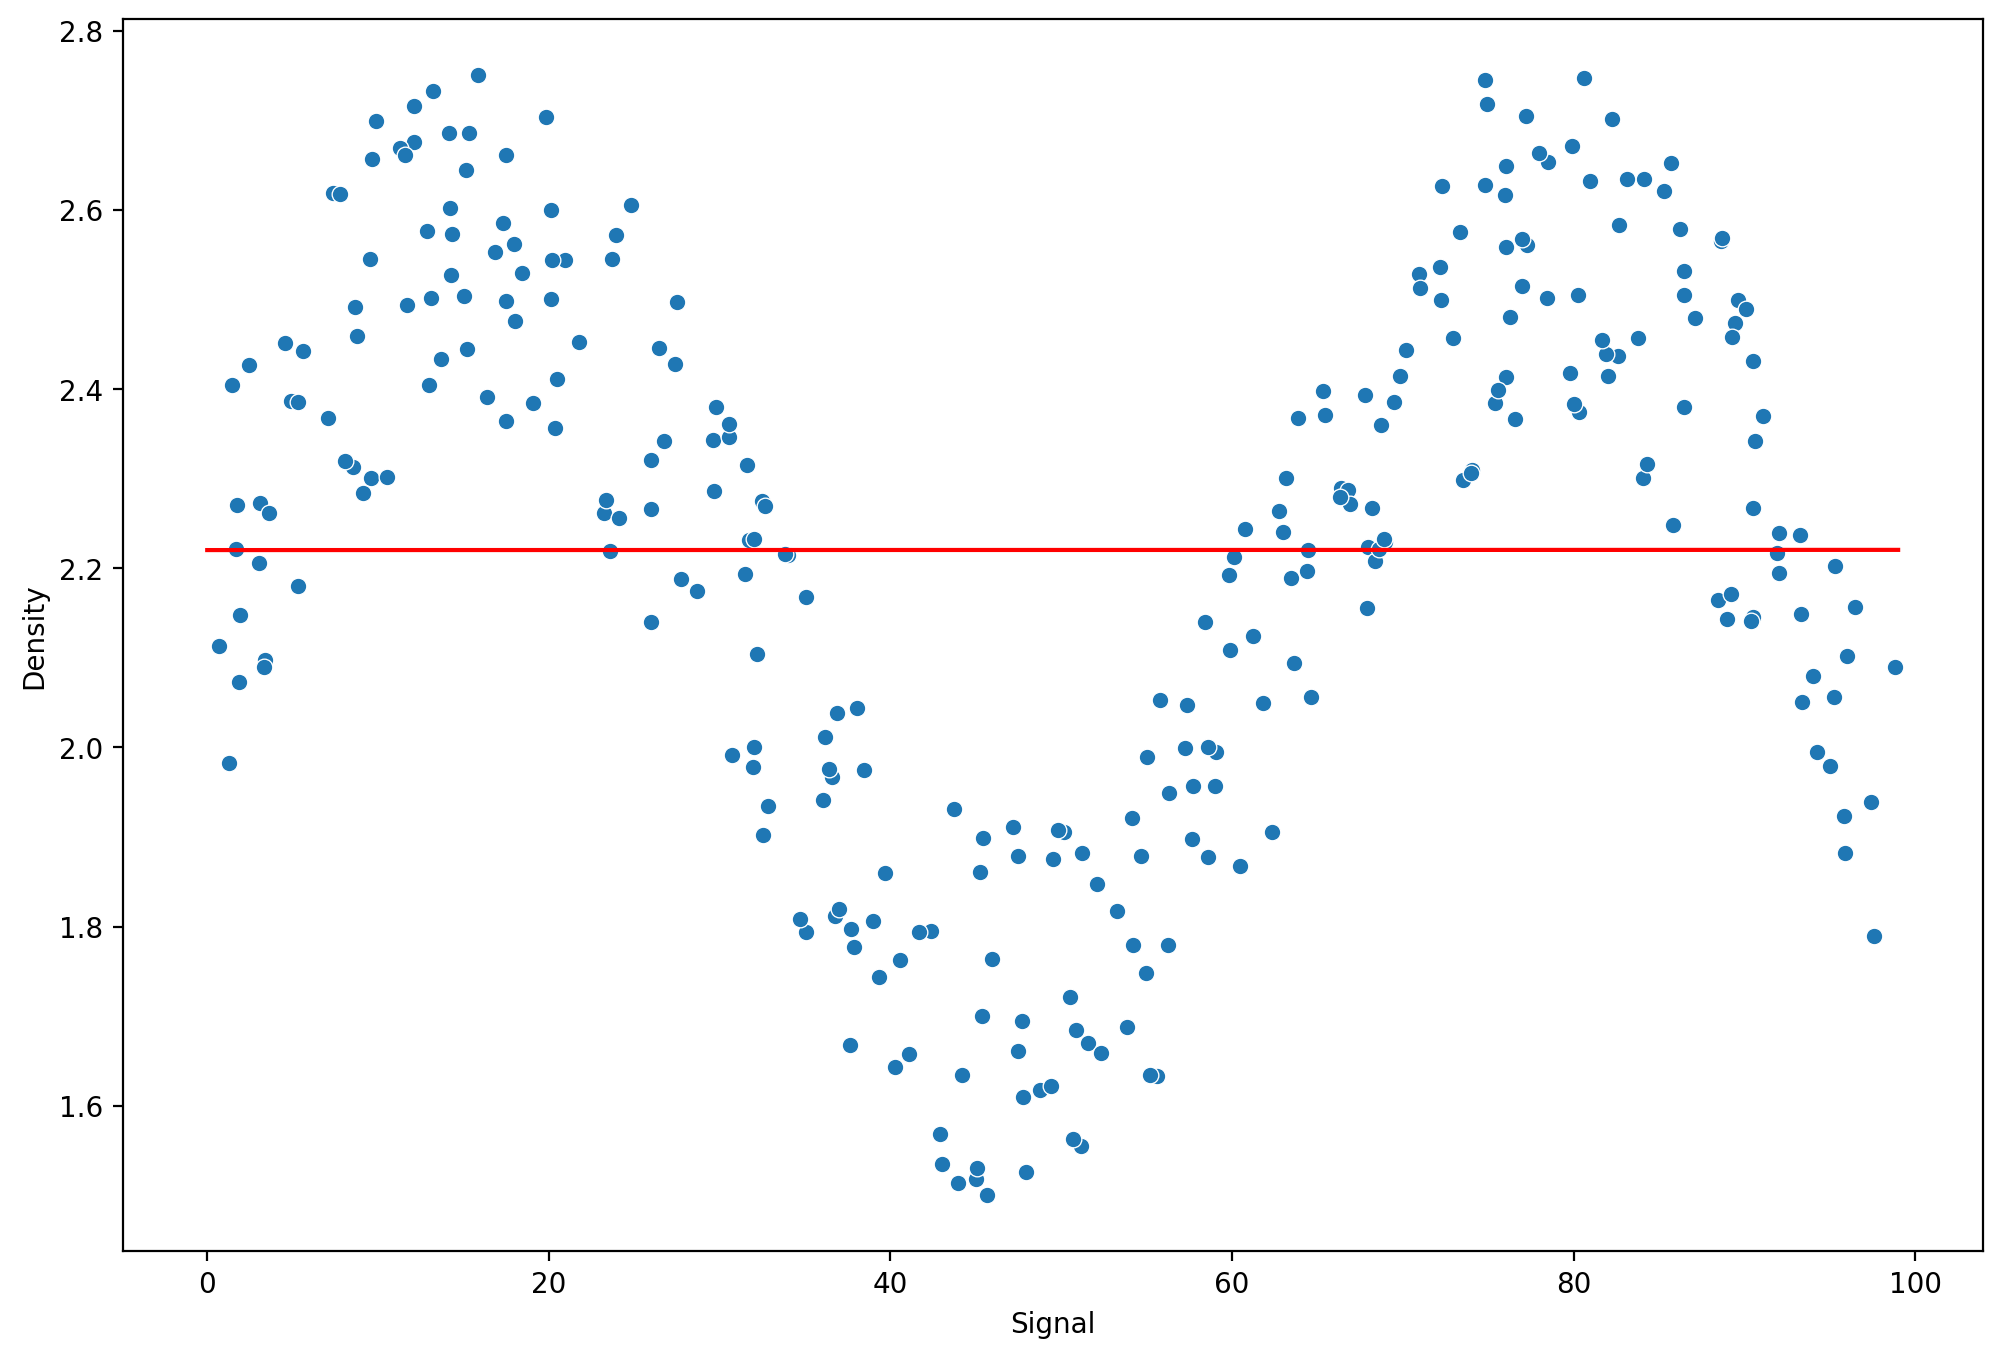

In [51]:
plt.figure(figsize = (12, 8), dpi = 200)
sns.scatterplot(x = 'Signal', y = 'Density', data = df)
plt.plot(signal_range, signal_preds, color = 'red')

In [53]:
def run_model(model, X_train, y_train, X_test, y_test):

    # Обучение модели
    model.fit(X_train, y_train)
    
    # Вычисление метрики
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')

    # Построение графика
    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))
    plt.figure(figsize = (12, 8), dpi = 200)
    sns.scatterplot(x = 'Signal', y = 'Density', data = df)
    plt.plot(signal_range, signal_preds, color = 'red')

MAE: 0.21119897331863297
RMSE: 0.2570051996584629


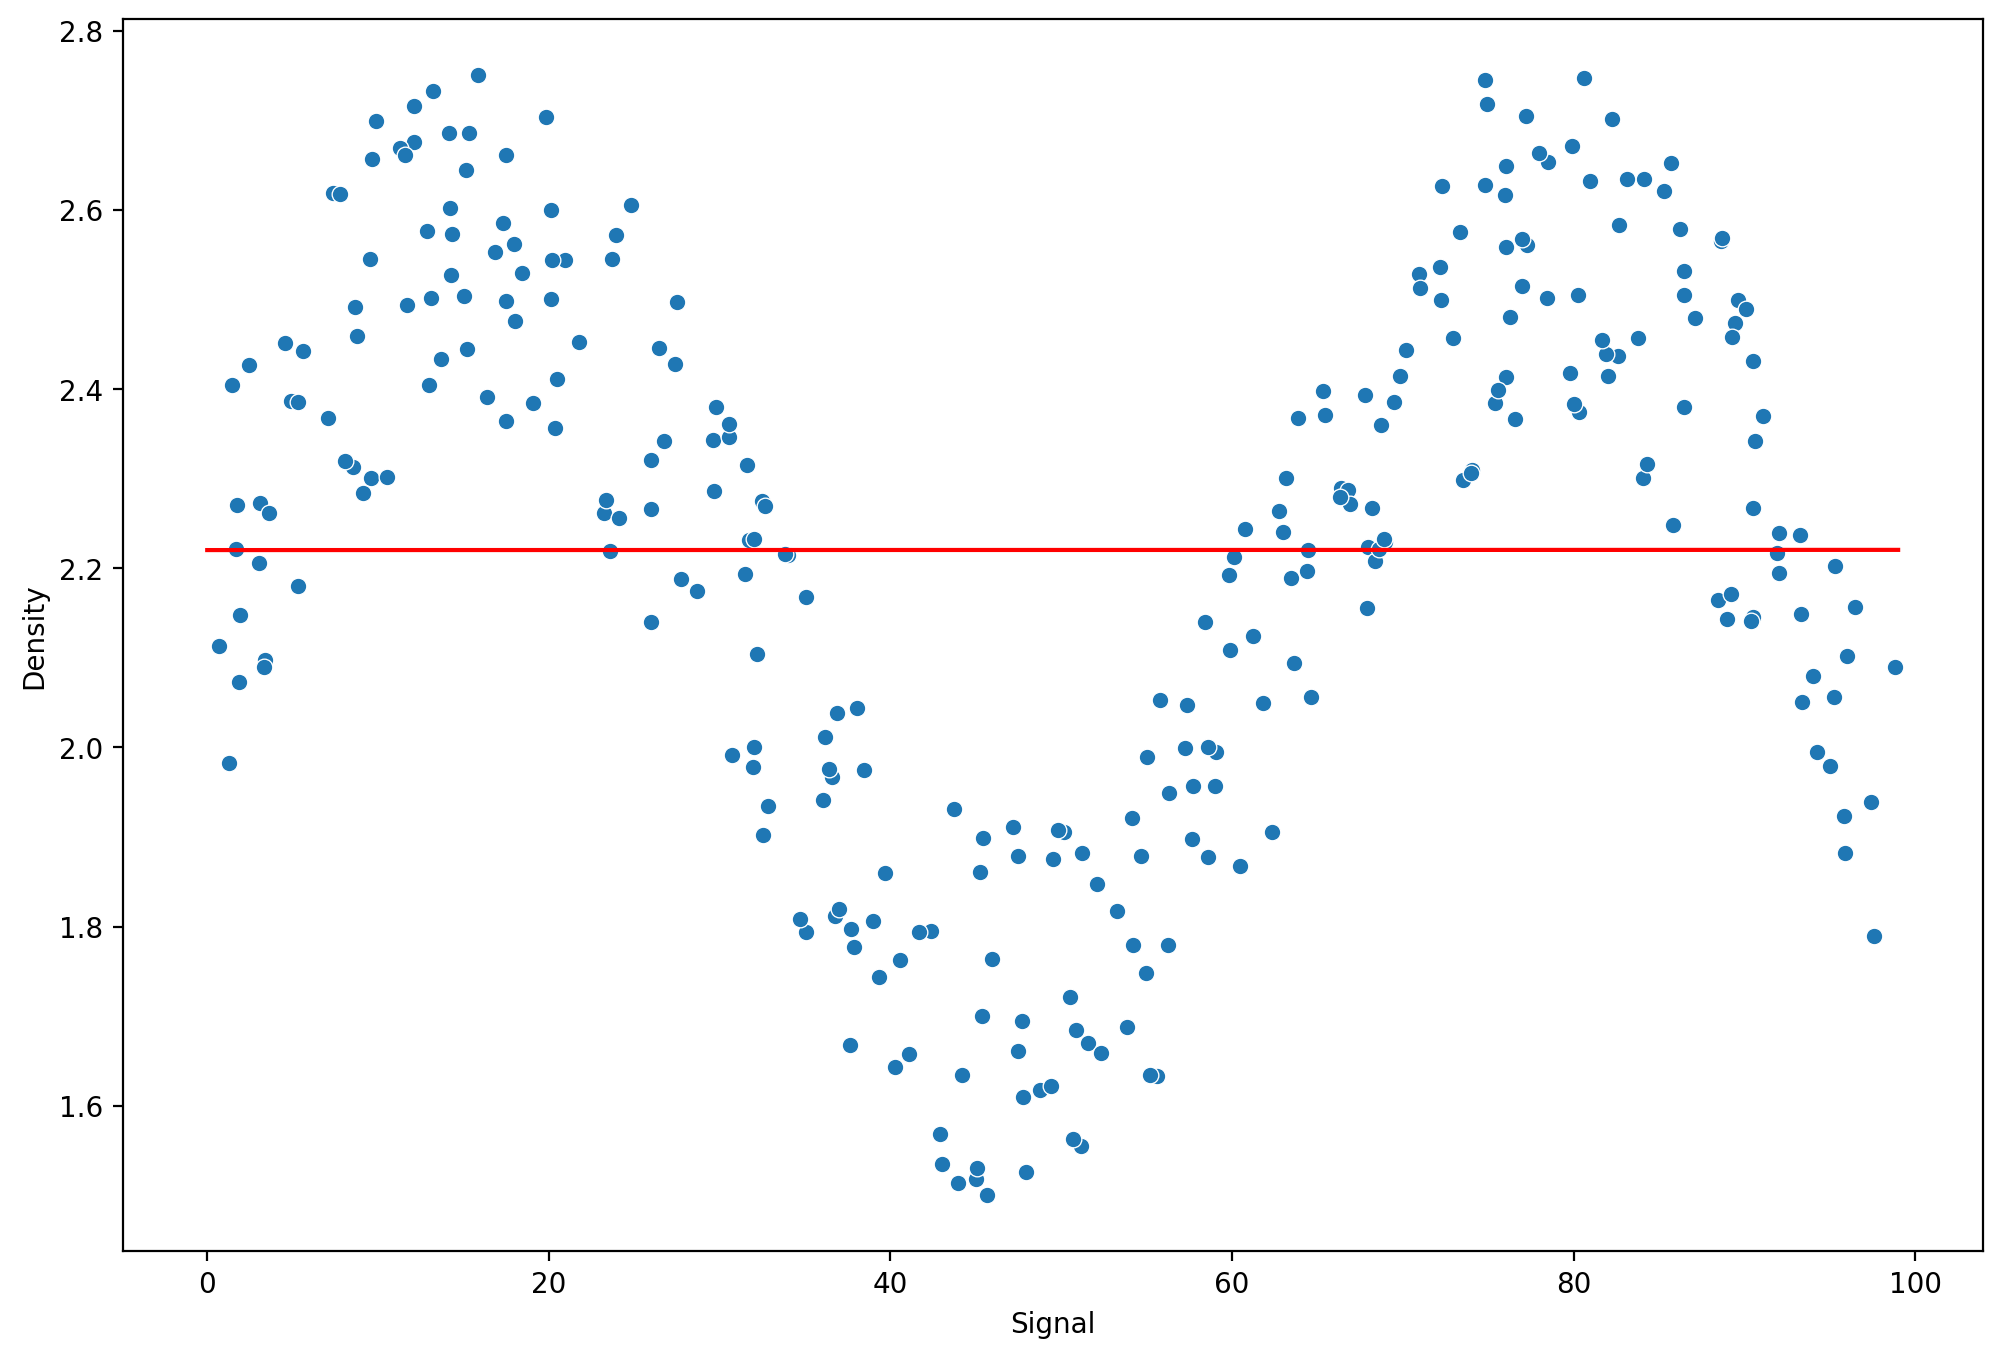

In [55]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

In [63]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

MAE: 0.2290310544351147
RMSE: 0.28173095637256484


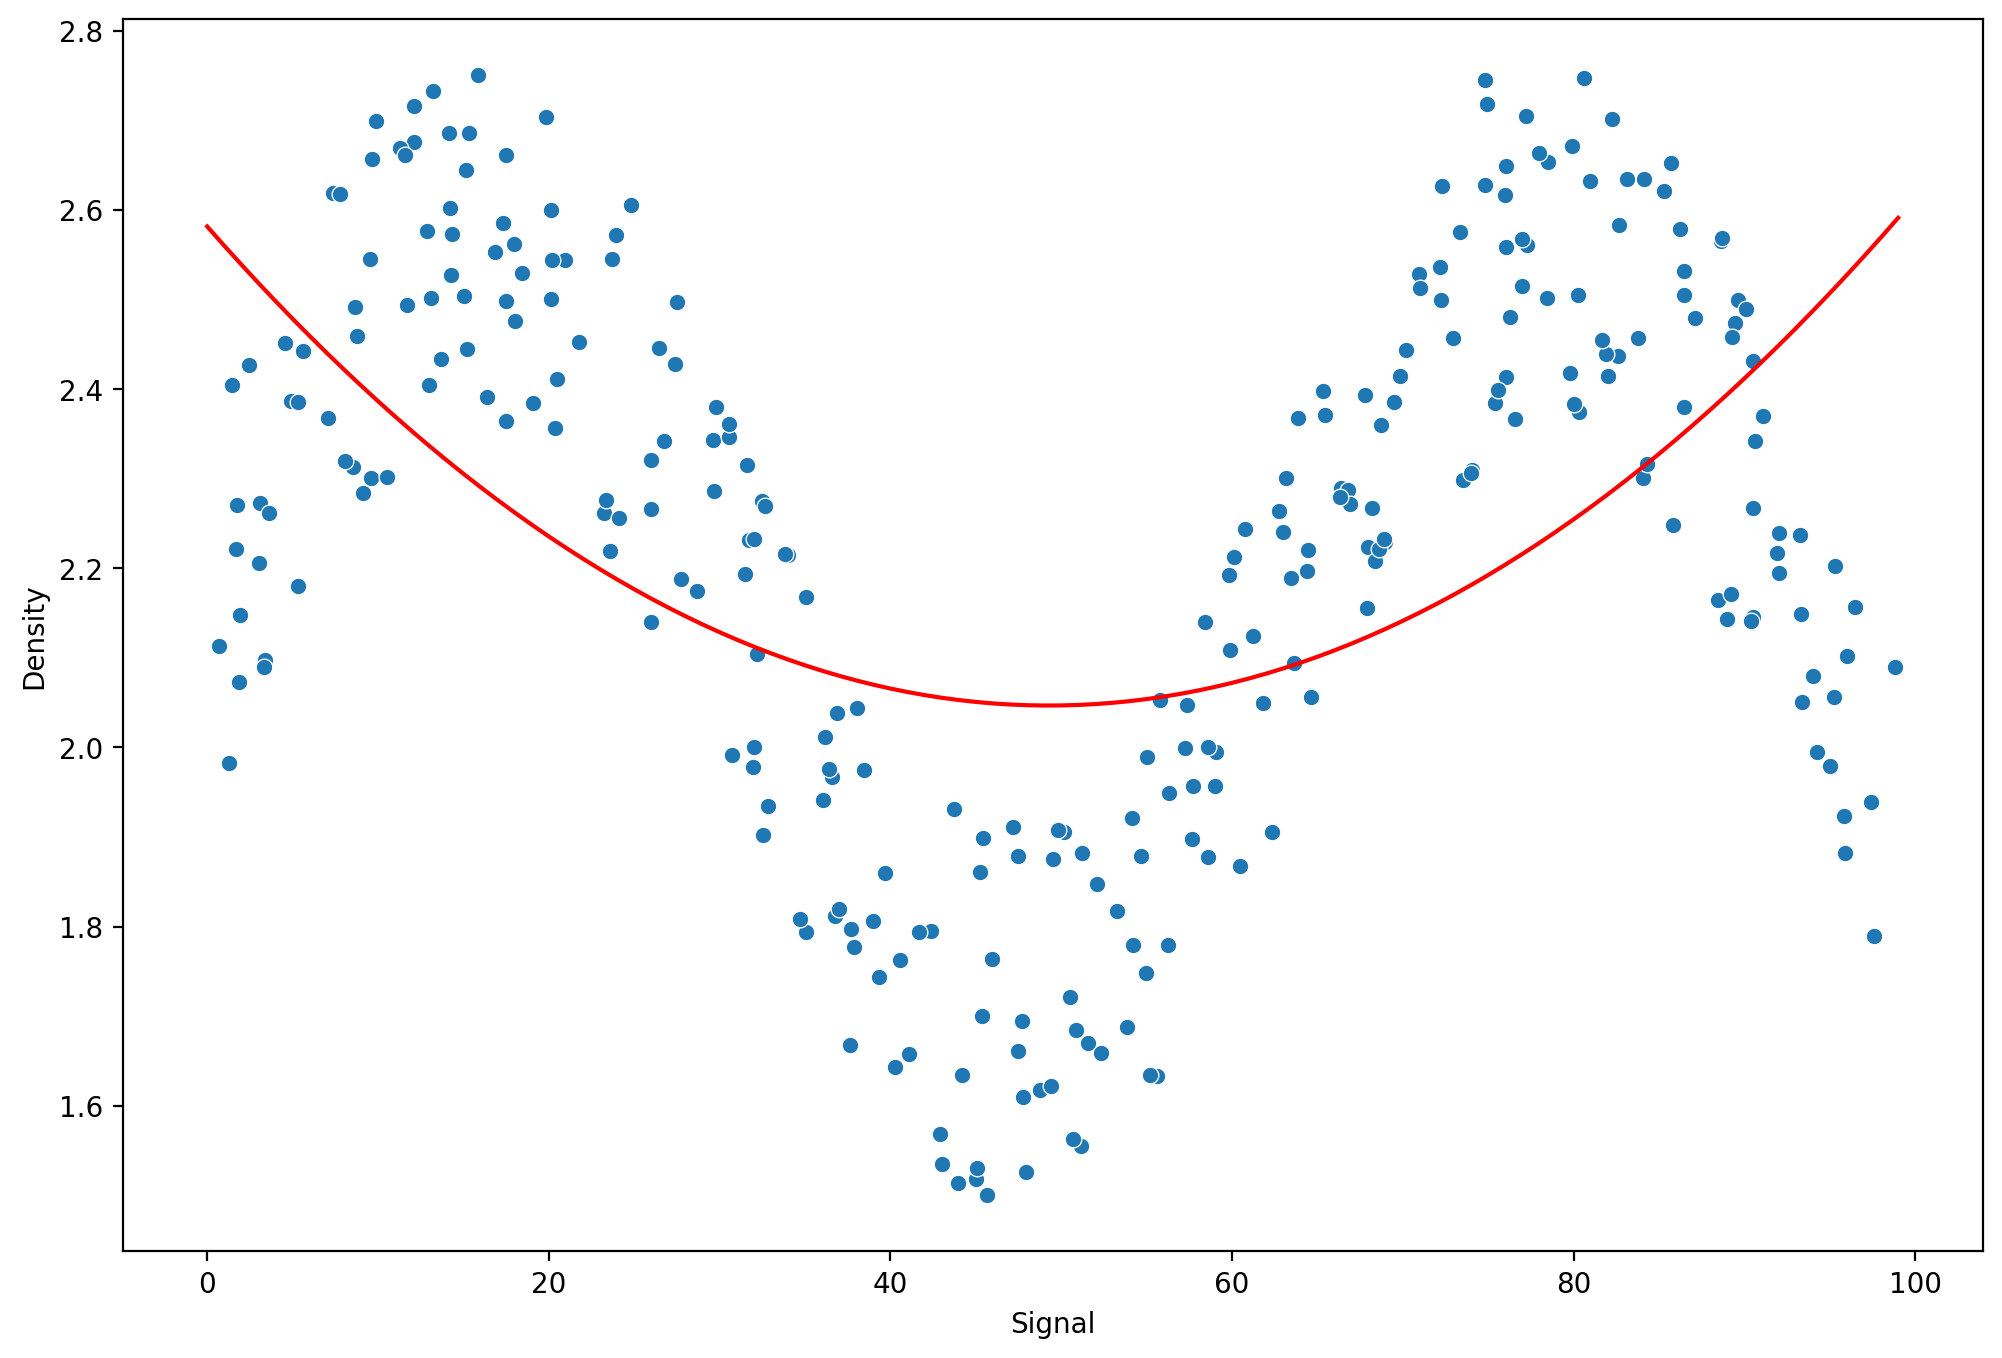

In [71]:
pipe = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

MAE: 0.11864313337268353
RMSE: 0.14452814361664867


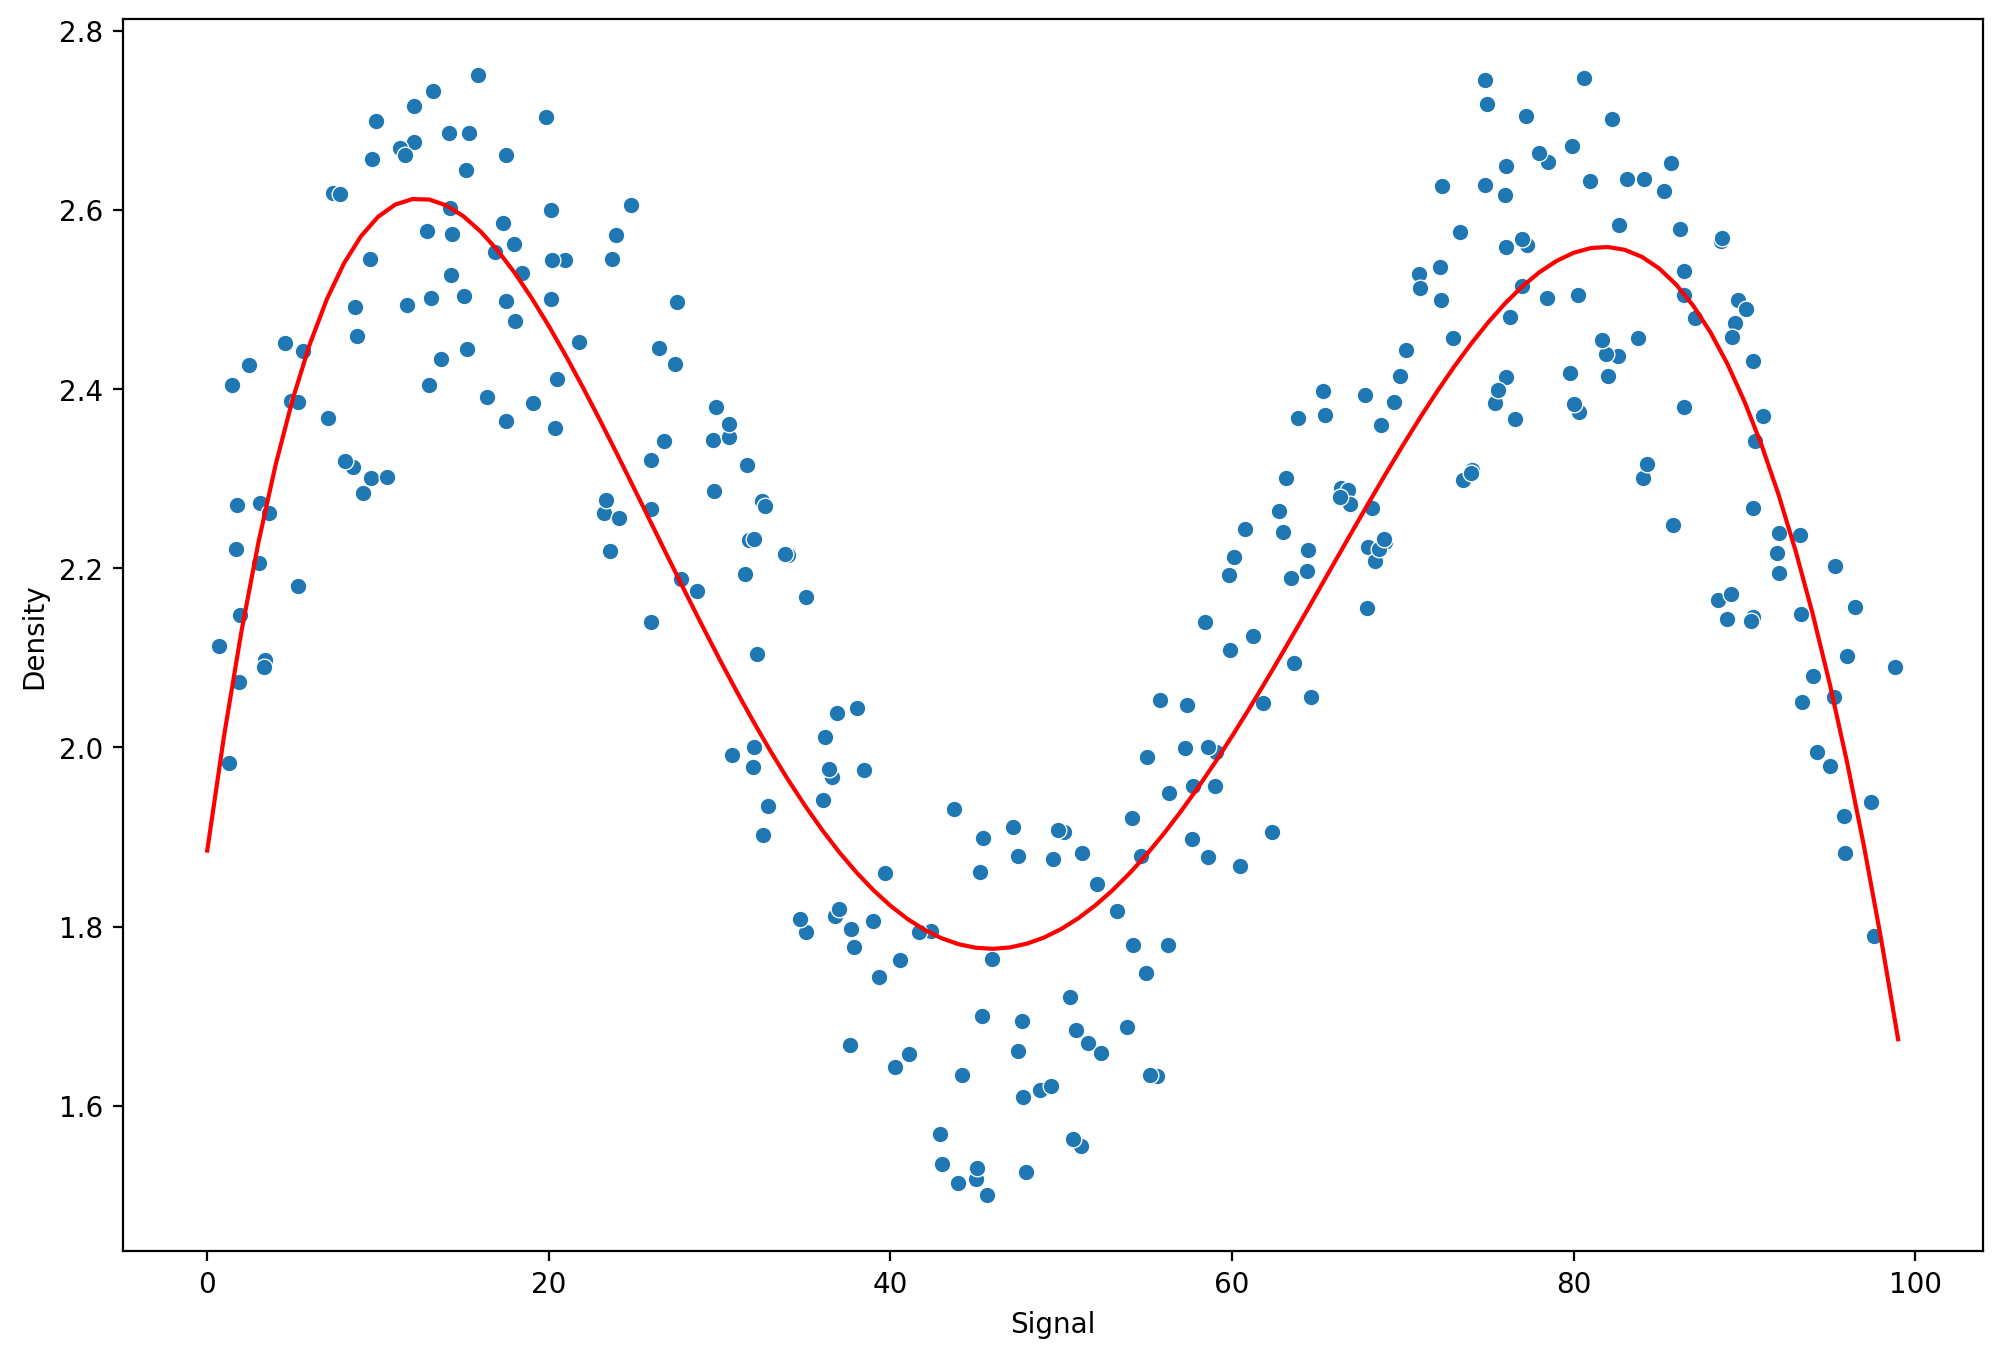

In [73]:
pipe = make_pipeline(PolynomialFeatures(degree = 5), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

In [79]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.12220524225759939
RMSE: 0.14026621441401857
MAE: 0.11561598074223126
RMSE: 0.133514827027529
MAE: 0.13363165935705315
RMSE: 0.15954234753677107


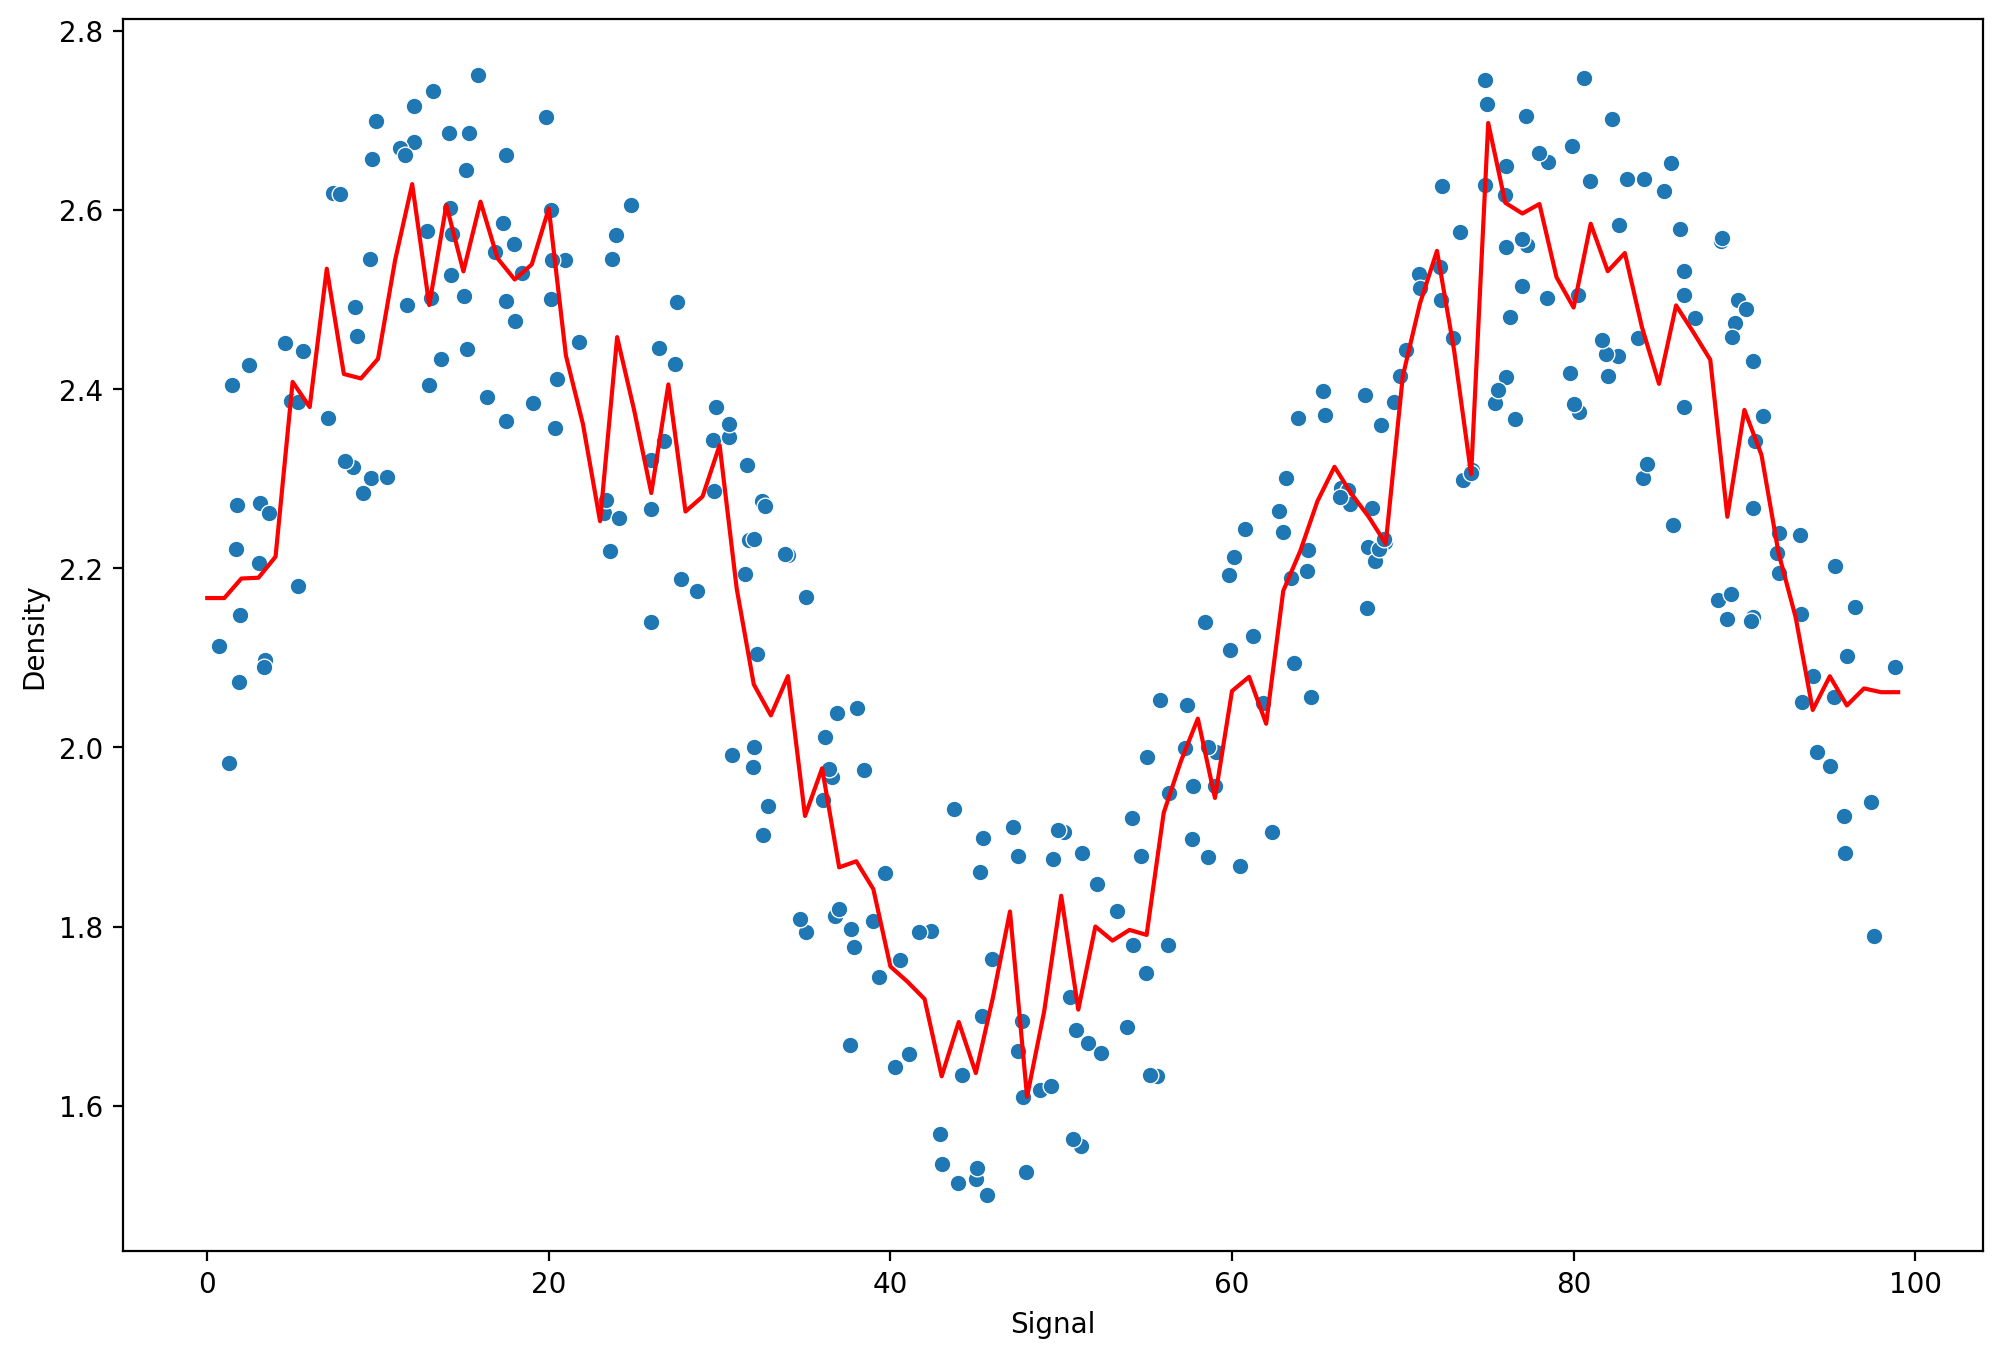

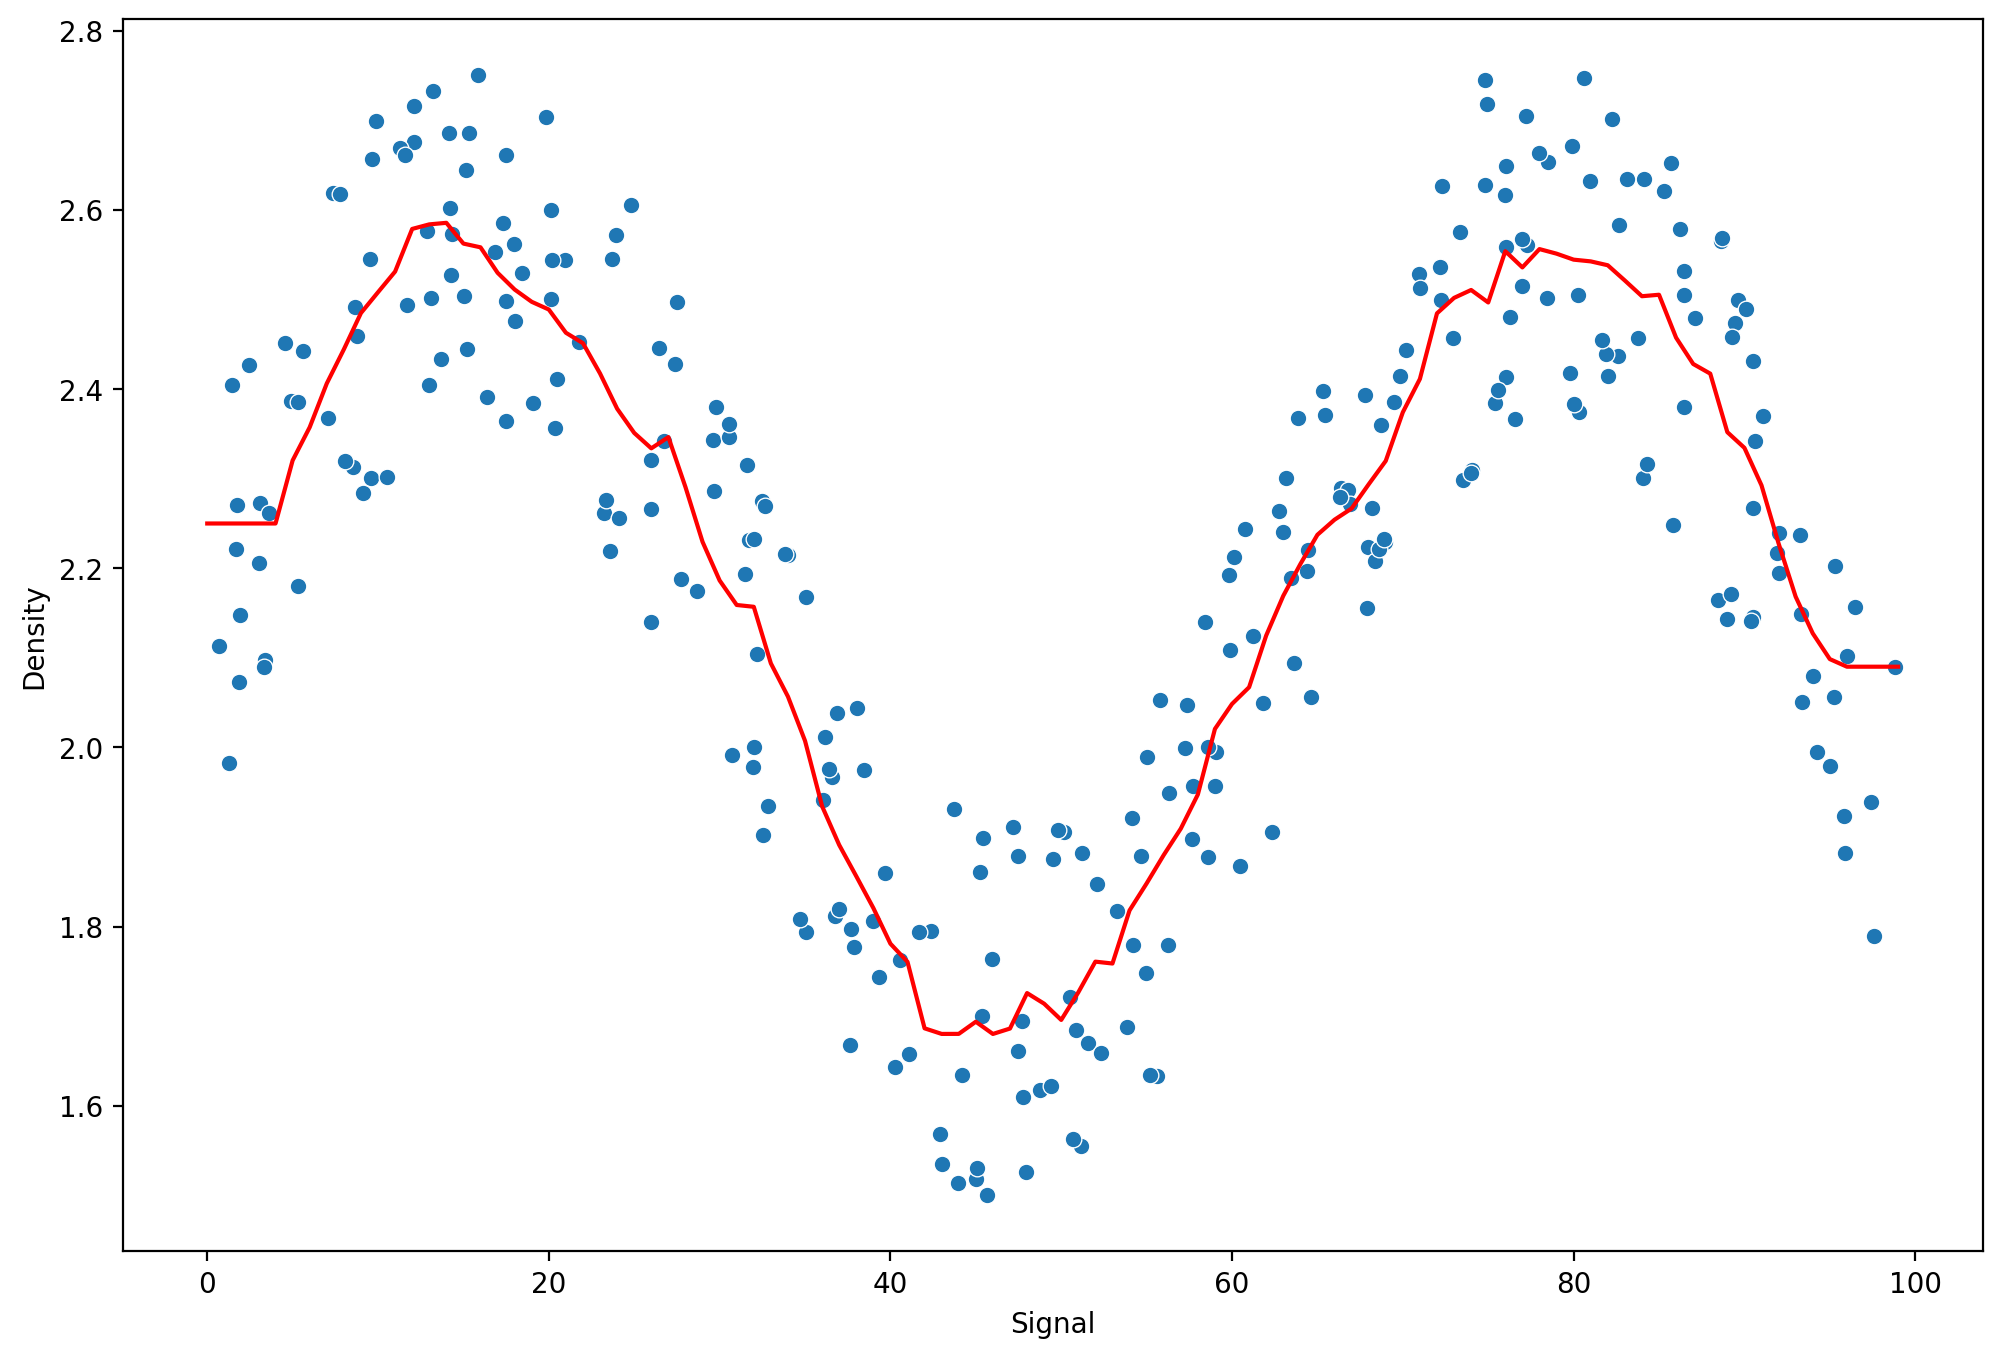

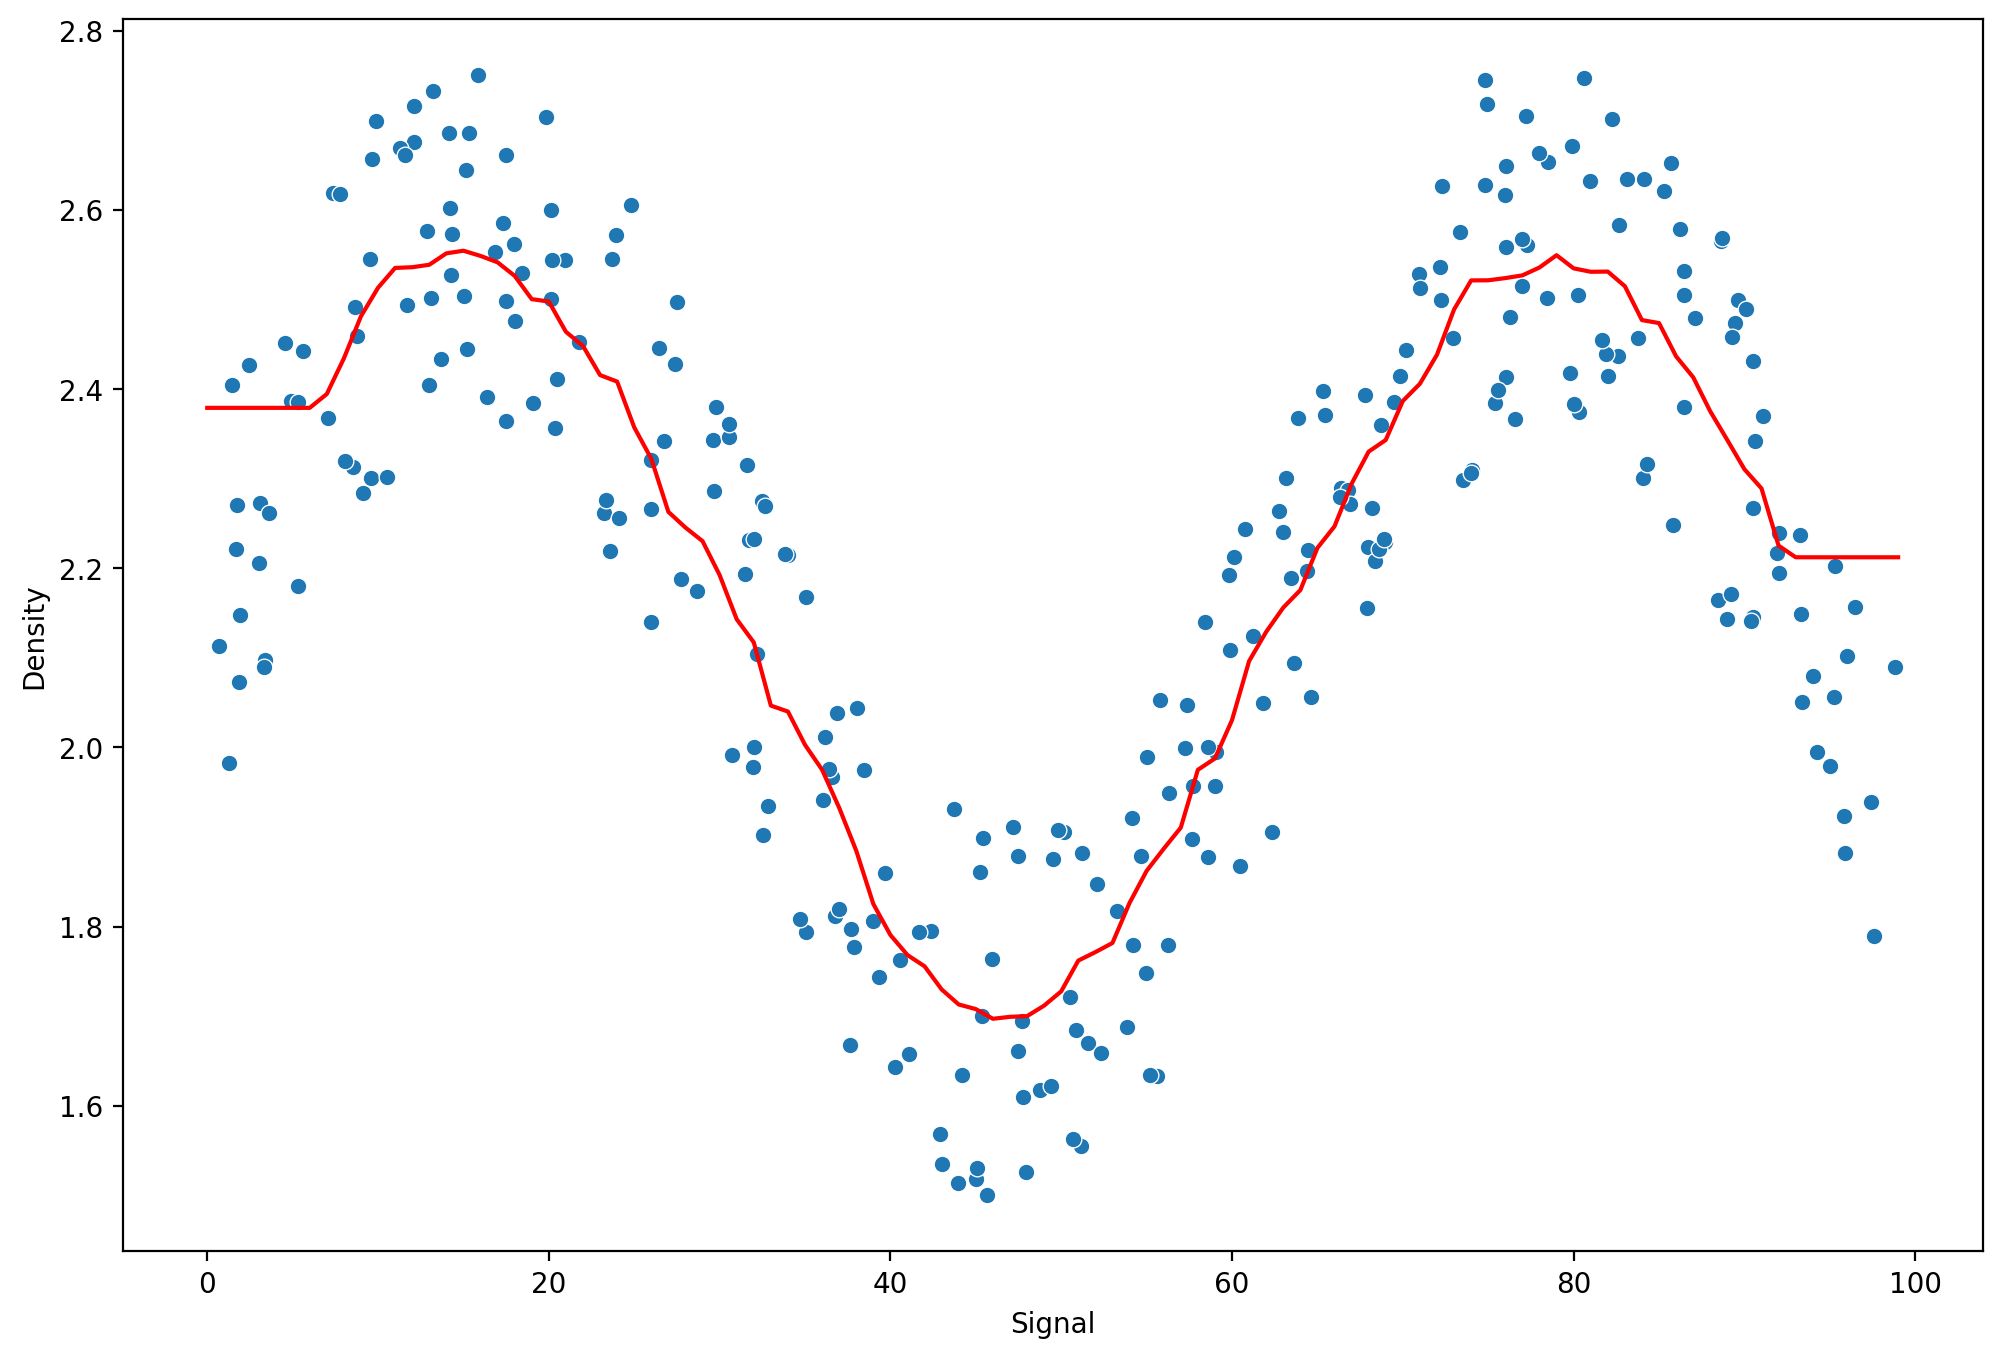

In [89]:
k_values = [3, 15, 30]

for k in k_values:
    model = KNeighborsRegressor(n_neighbors = k)
    run_model(model, X_train, y_train, X_test, y_test)

In [93]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442386
RMSE: 0.15234870286353372


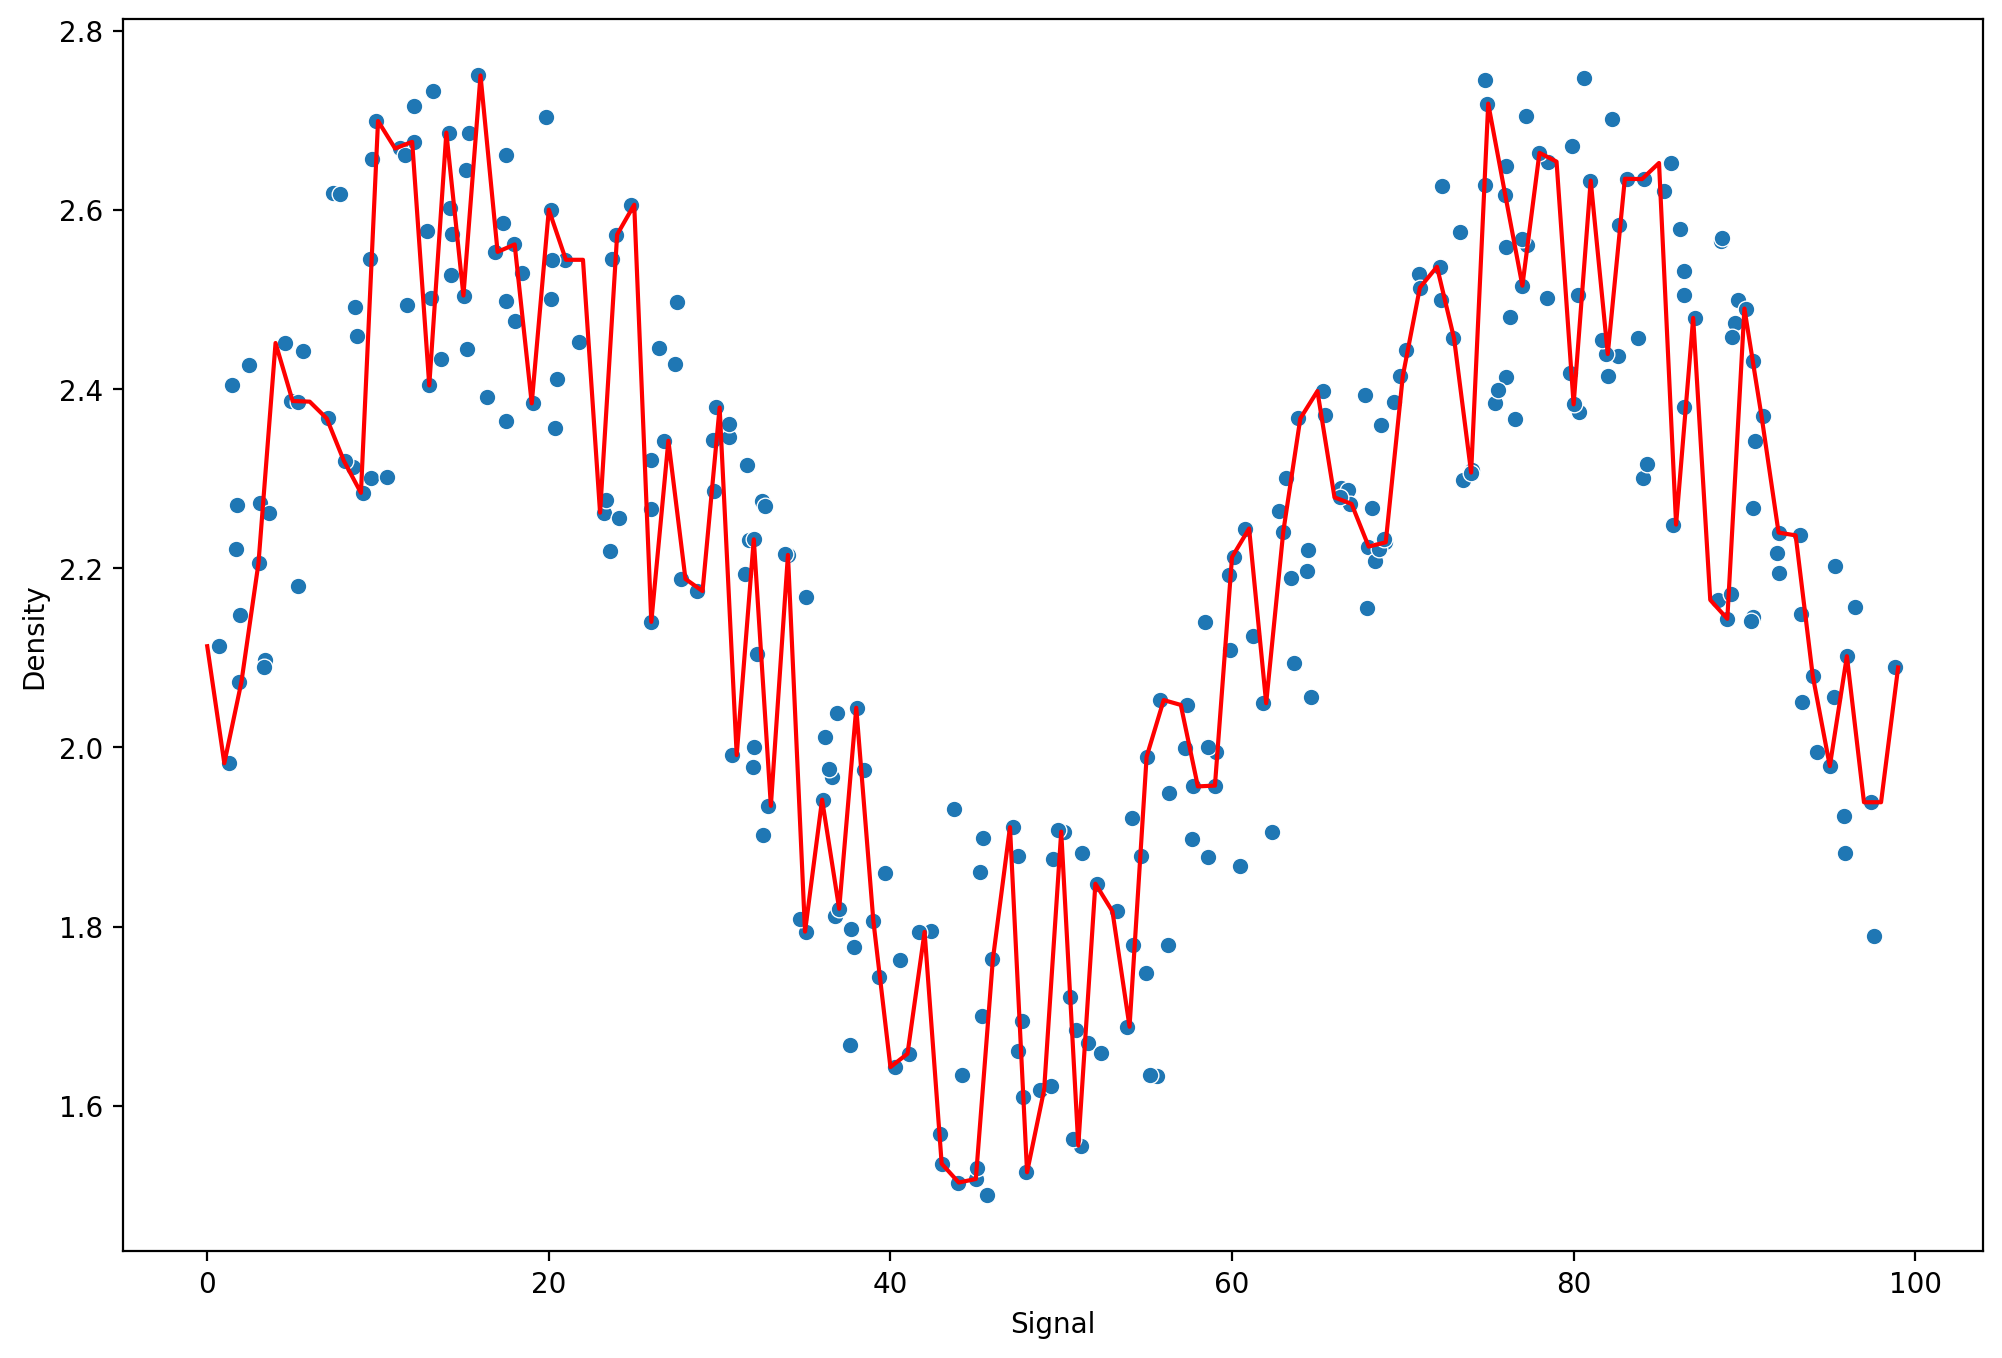

In [109]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

MAE: 0.14631897771489977
RMSE: 0.17430663362300228


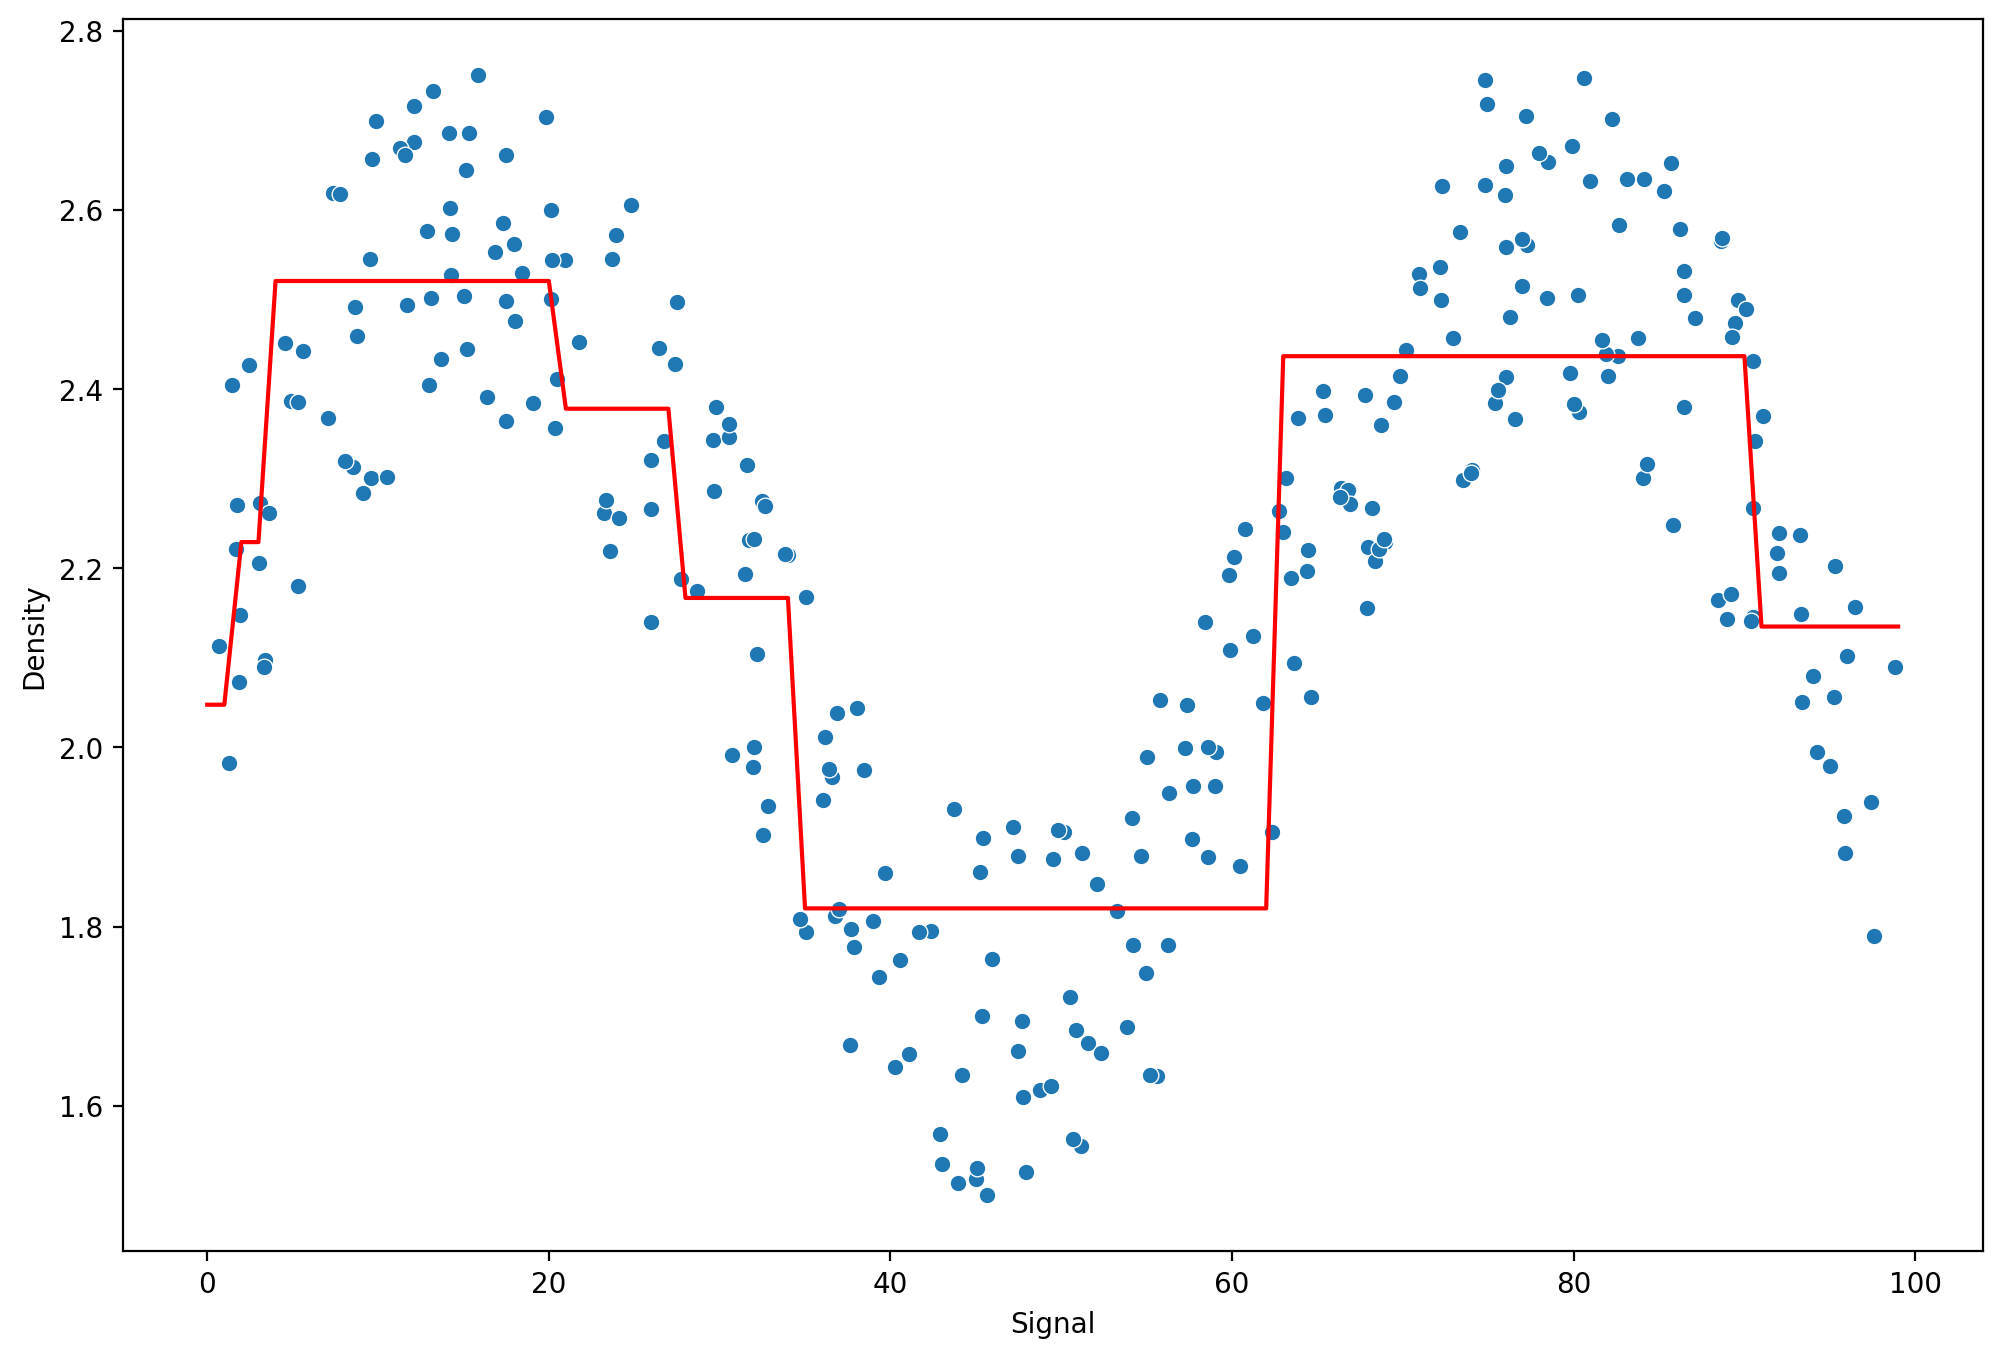

In [111]:
model = DecisionTreeRegressor(max_depth=3)
run_model(model, X_train, y_train, X_test, y_test)

In [113]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

MAE: 0.11243464547616575
RMSE: 0.1301404448215704


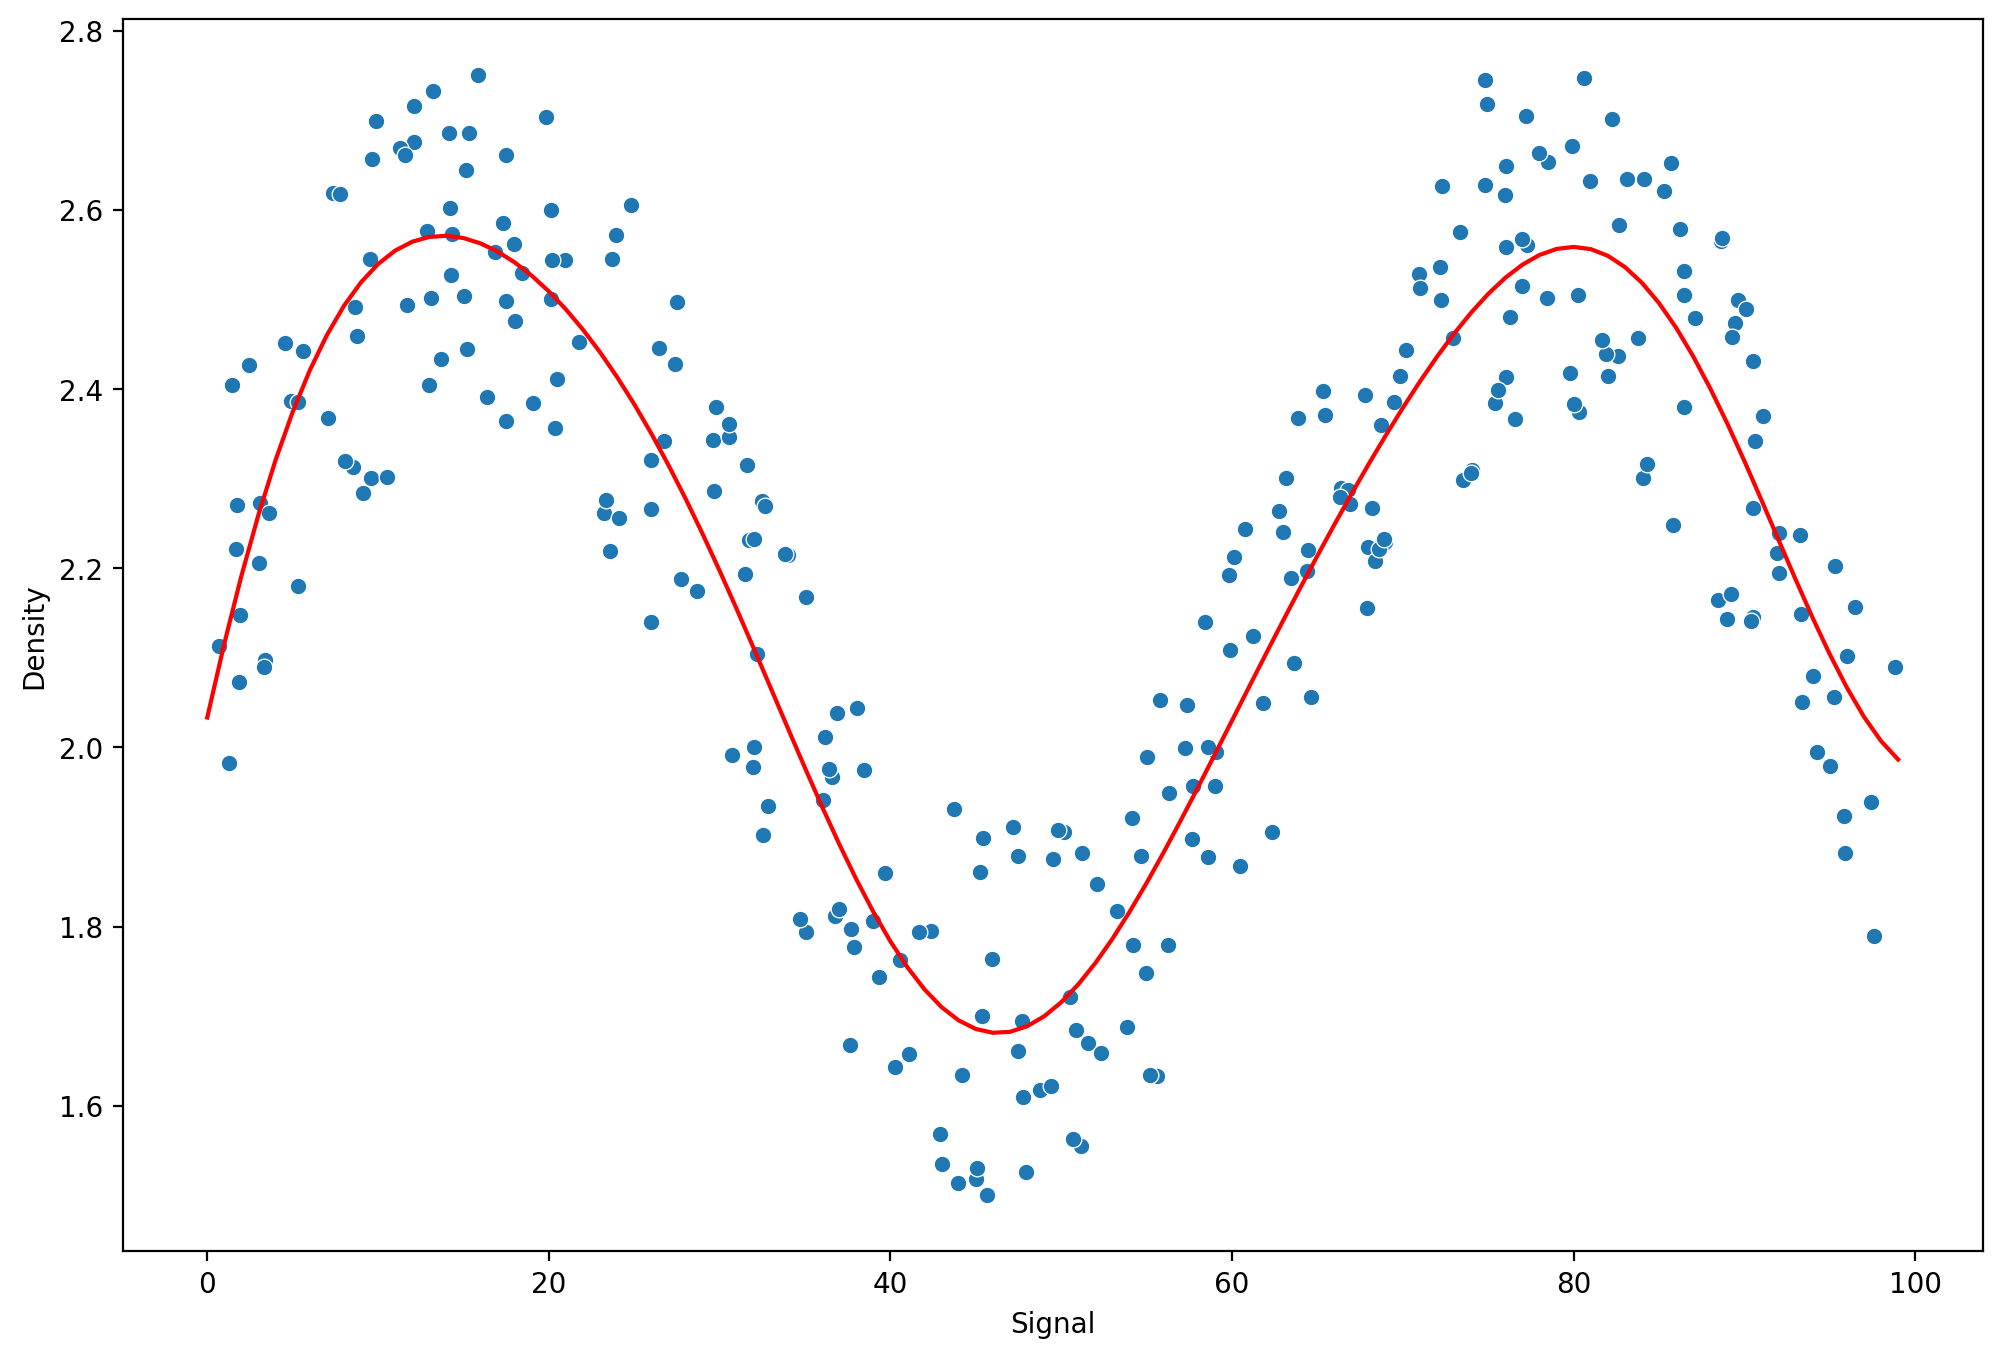

In [115]:
svr = SVR()
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100],
              'gamma': ['auto', 'scale']}

grid = GridSearchCV(svr, param_grid)
run_model(grid, X_train, y_train, X_test, y_test)

In [117]:
from sklearn.ensemble import RandomForestRegressor

MAE: 0.11252370296479088
RMSE: 0.1353986100882572


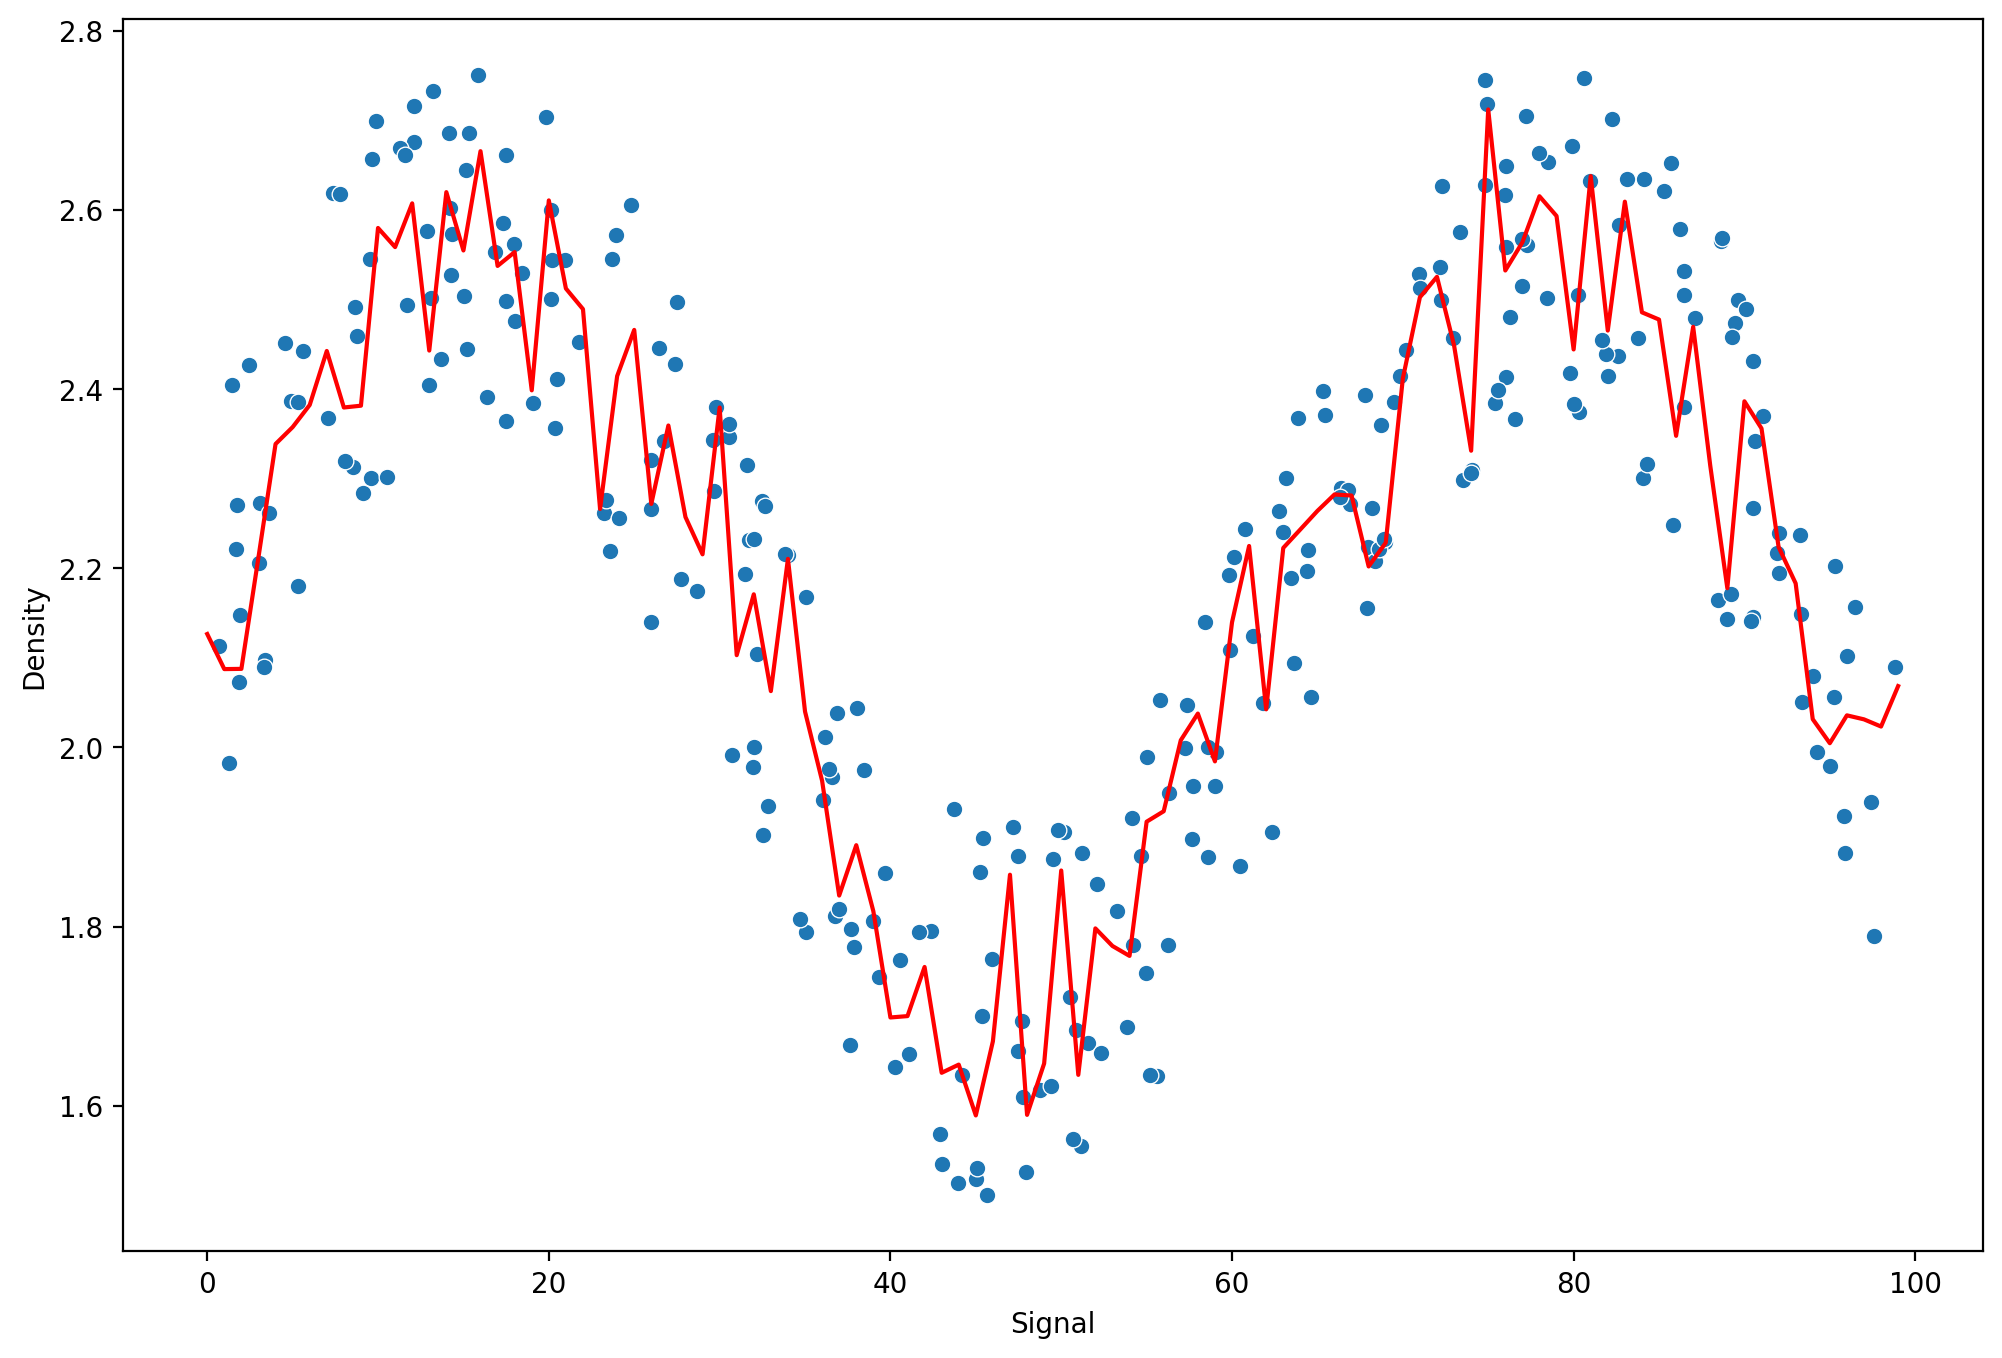

In [127]:
rfr = RandomForestRegressor(n_estimators=10)
run_model(rfr, X_train, y_train, X_test, y_test)

In [129]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

MAE: 0.11318284854800688
RMSE: 0.13294148649584664


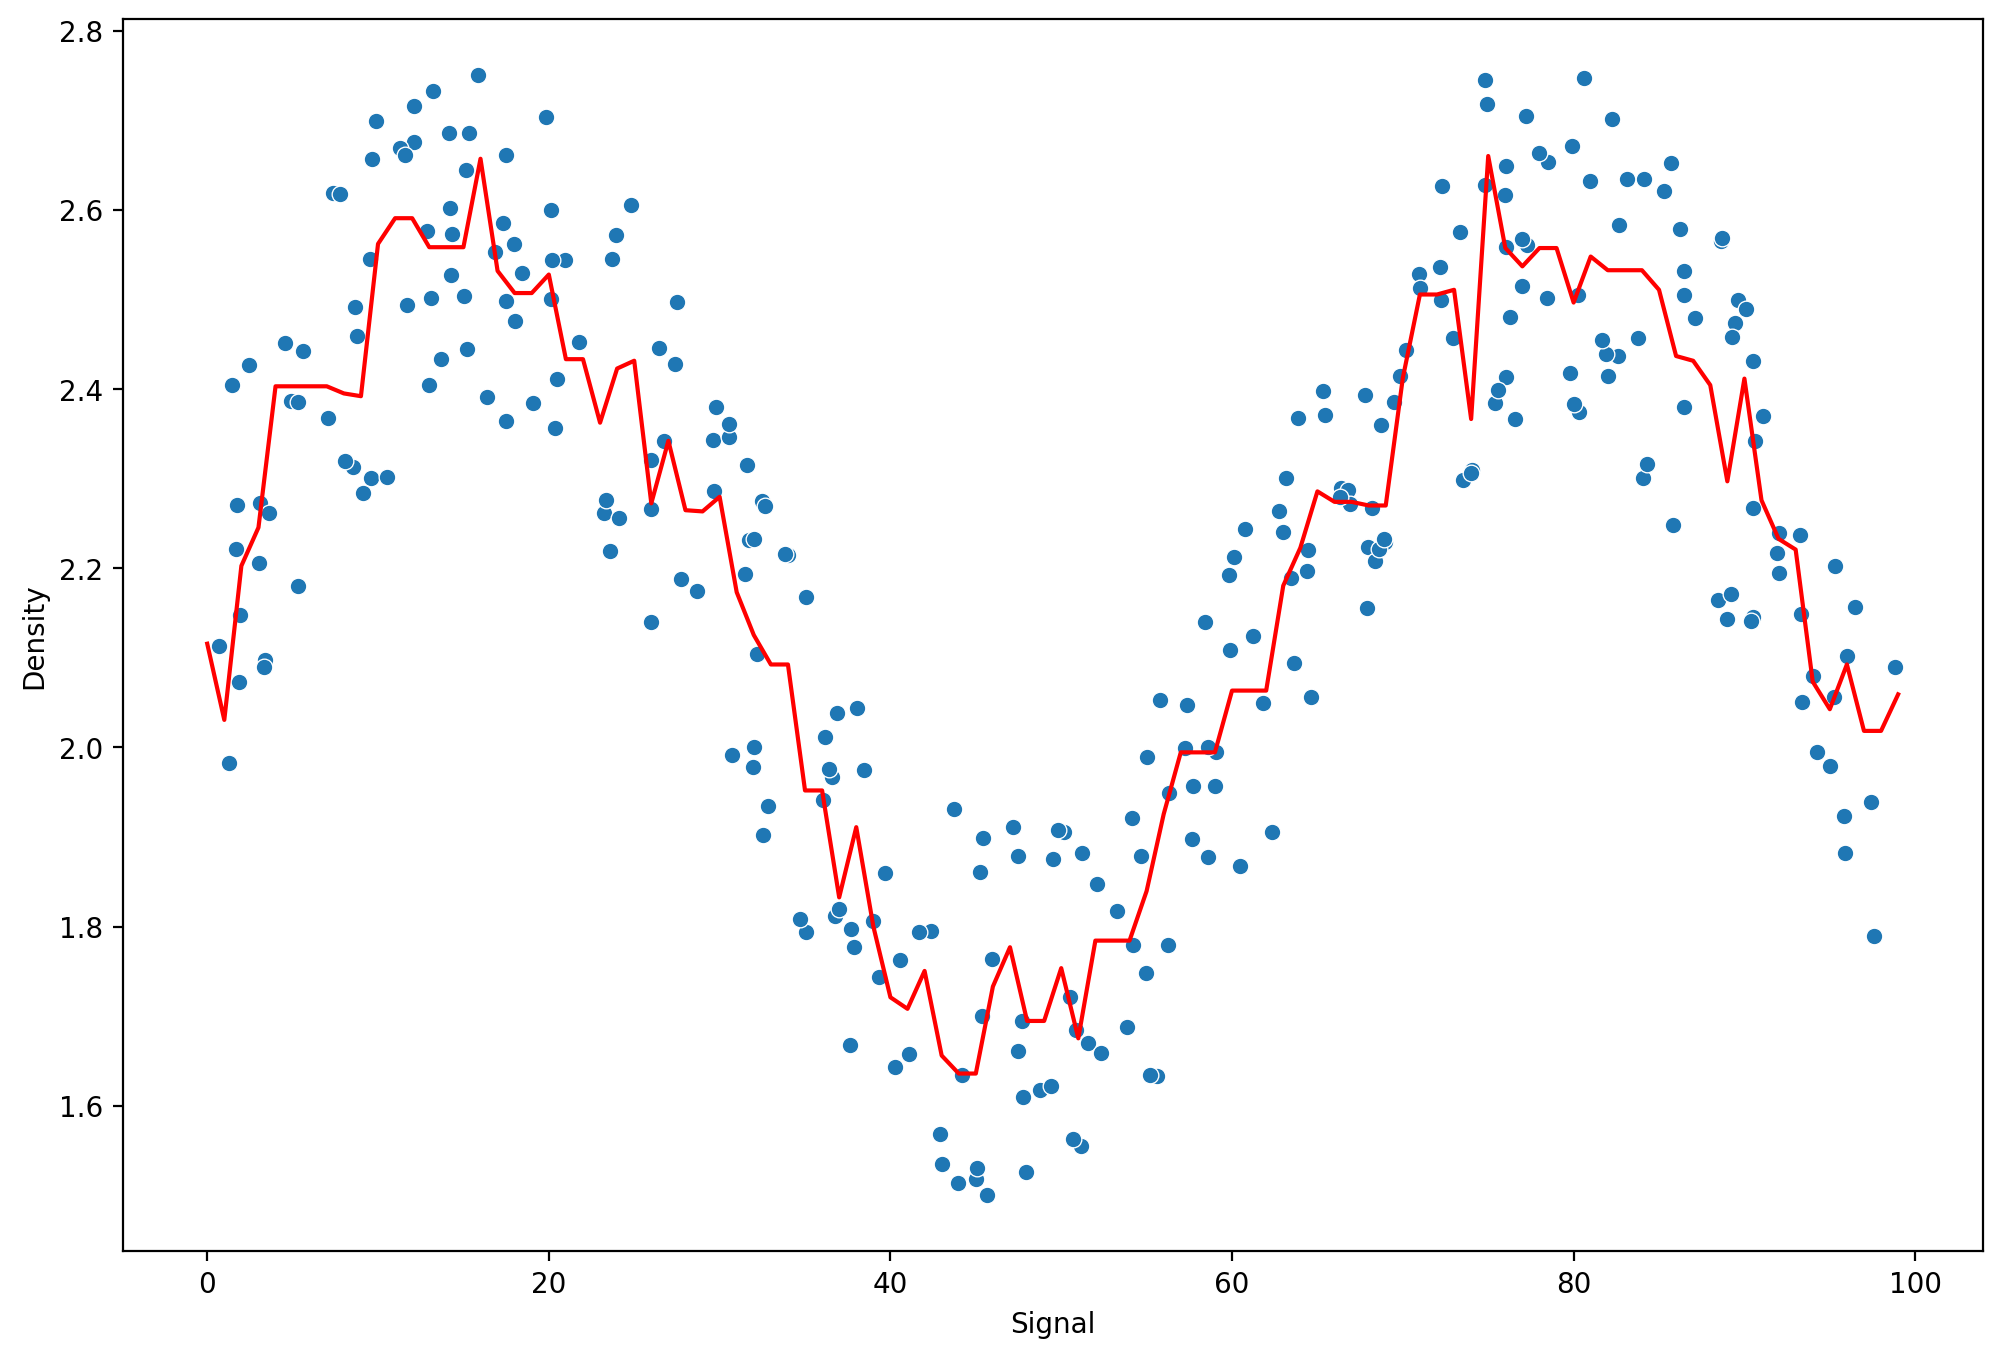

In [131]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

MAE: 0.11705413559181244
RMSE: 0.13442595794819884


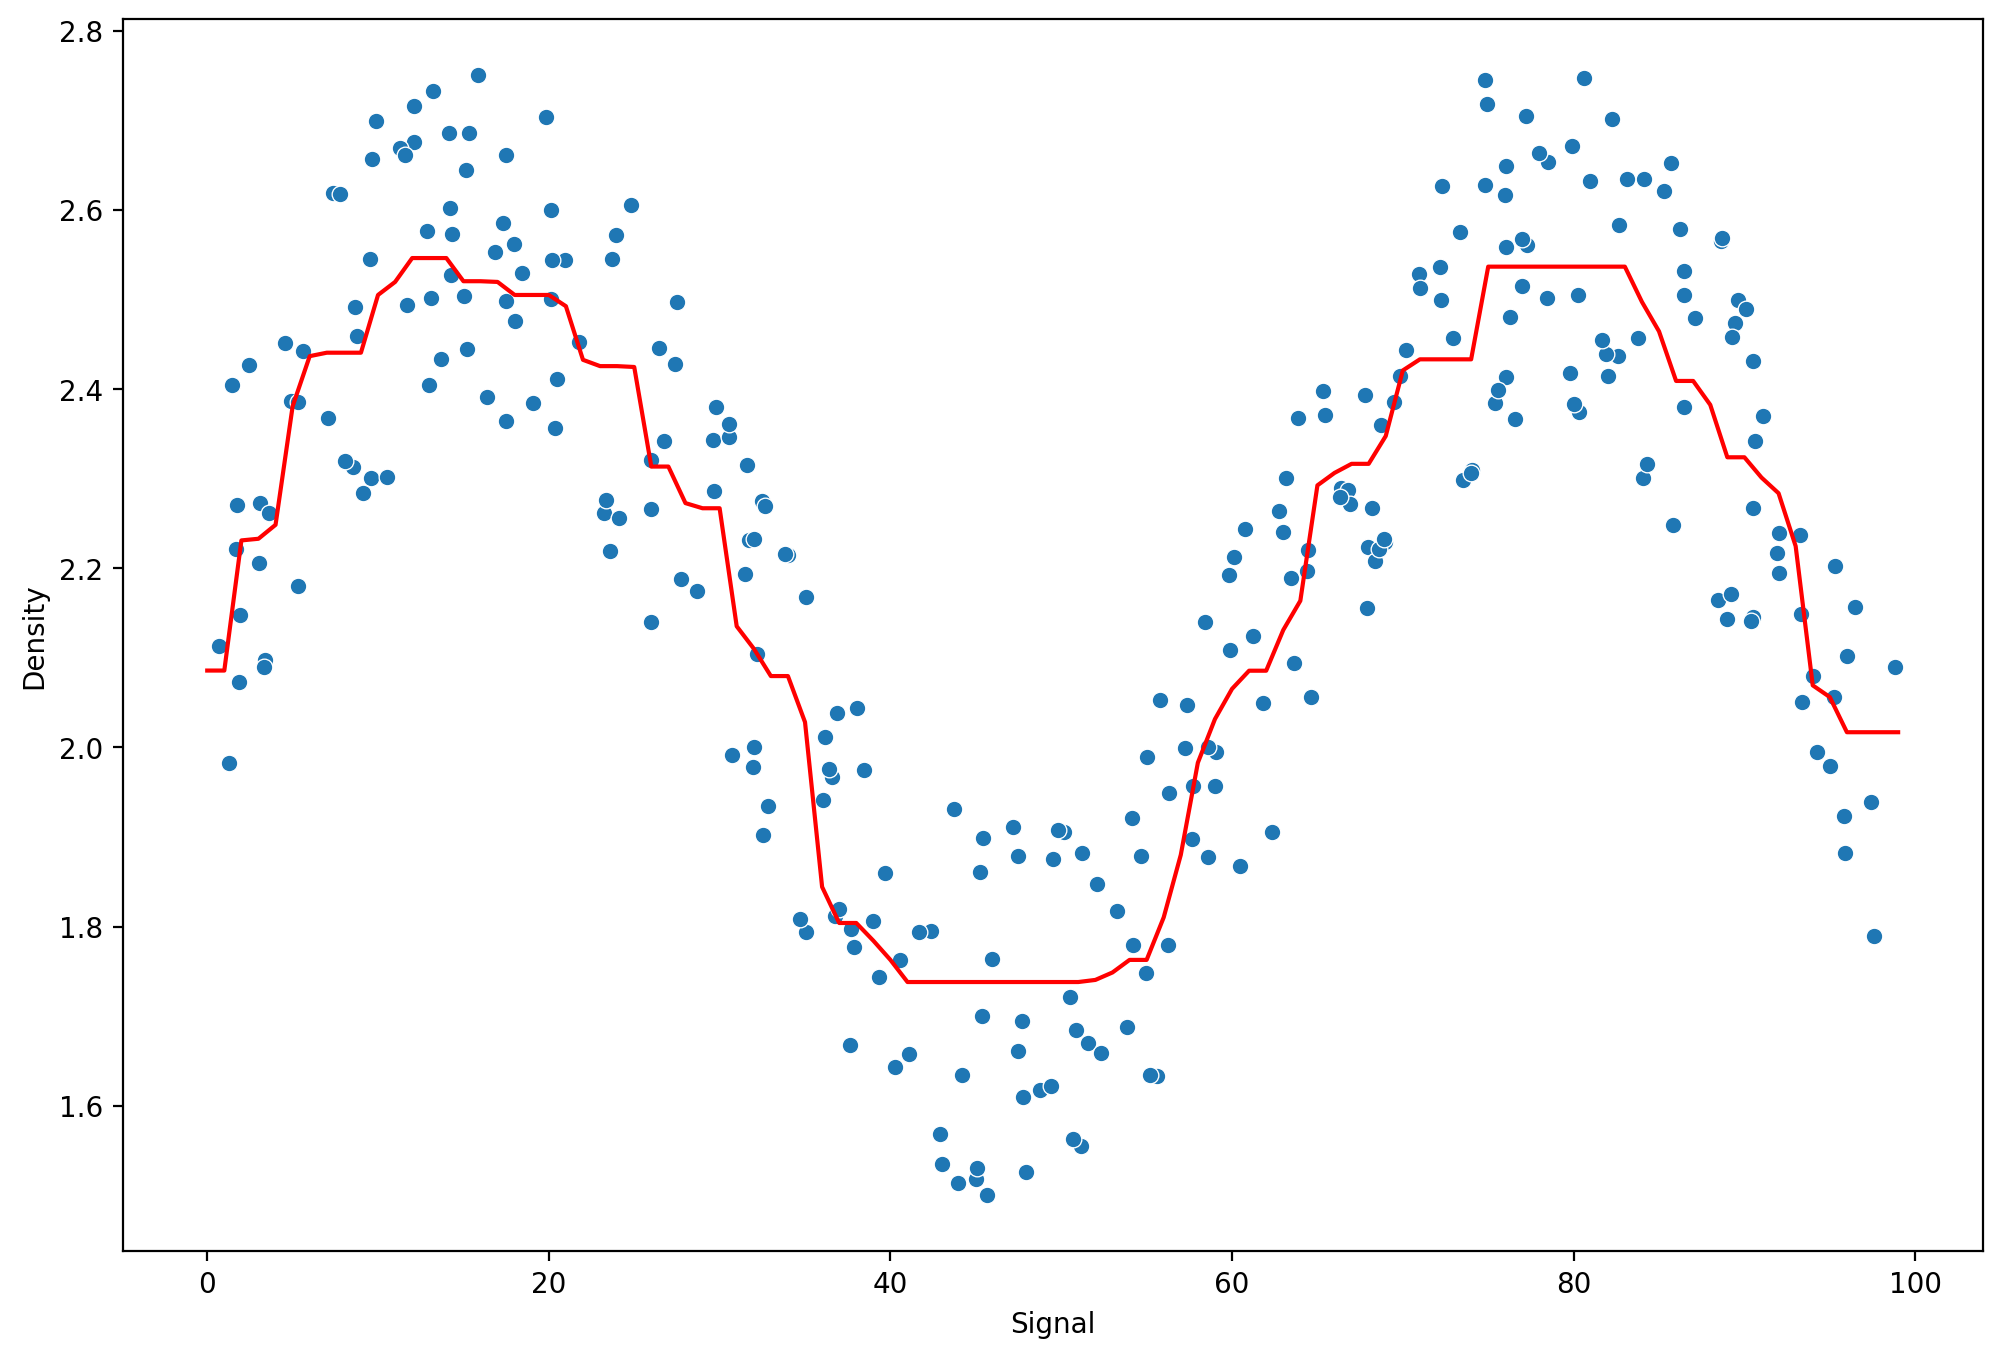

In [133]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)